# Customer Personality Analysis

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset

df = pd.read_csv(r"marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Show all columns 
pd.set_option('display.max_columns',None)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Column Description

ID: Unique identifier for each customer.

Year_Birth:	Year the customer was born.

Education:	Educational qualification of the customer (e.g., Graduation, PhD).

Marital_Status:	Marital status (e.g., Single, Married, Divorced, etc.).

Income:	Yearly household income of the customer.

Kidhome: Number of small children (kids) in customer's household.

Teenhome: Number of teenagers in customer's household.

Dt_Customer: Date when the customer enrolled with the company.

Recency: Number of days since the customer last made a purchase.

Complain: 1 if the customer has complained, else 0.

MntWines: Amount spent on wine.

MntFruits: Amount spent on fruits.

MntMeatProducts: Amount spent on meat products.

MntFishProducts: Amount spent on fish products.

MntSweetProducts: Amount spent on sweets.

MntGoldProds: Amount spent on gold products (luxury items).

NumDealsPurchases: Number of purchases made with a discount.

NumWebPurchases: Purchases made through the website.

NumCatalogPurchases: Purchases through catalog.

NumStorePurchases: Purchases made in physical stores.

NumWebVisitsMonth: Number of visits to the company’s website in the last month.

AcceptedCmp1 to AcceptedCmp5: Whether the customer accepted a specific marketing campaign (1 = Yes, 0 = No).

Response: Whether the customer accepted the last campaign (1 = Yes, 0 = No).


## Data Understanding

In [4]:
# Check the shape of the data (rows and columns)

print ('No. of Rows:',df.shape[0])
print('No. of Columns:', df.shape[1])

No. of Rows: 2240
No. of Columns: 29


### Handle Duplicates

In [5]:
# Check Duplicates
df.duplicated().sum()

0

In [6]:
# Check info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Fix Data Types

In [7]:
# Check datatypes
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Dt_Customer column in object datatype so we want Convert to Date Format datatype

In [8]:
# Convert to Date Format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

### Handle Missing Values

In [9]:
# Check null values

df.isnull().sum() / df.shape[0] *100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Income column has 1.07% missing values

In [10]:
# Remove the missing values
df.dropna(inplace=True)

In [11]:
# after removed null values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Data Summary

In [12]:
# statistic summary for Numeric columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2216.0,5588.353339,0.0,2814.75,5458.5,8421.75,11191.0,3249.376275
Year_Birth,2216.0,1968.820397,1893.0,1959.0,1970.0,1977.0,1996.0,11.985554
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2216.0,0.441787,0.0,0.0,0.0,1.0,2.0,0.536896
Teenhome,2216.0,0.505415,0.0,0.0,0.0,1.0,2.0,0.544181
Dt_Customer,2216,2013-07-10 11:29:27.509025280,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-31 00:00:00,2014-06-29 00:00:00,NaN
Recency,2216.0,49.012635,0.0,24.0,49.0,74.0,99.0,28.948352
MntWines,2216.0,305.091606,0.0,24.0,174.5,505.0,1493.0,337.32792
MntFruits,2216.0,26.356047,0.0,2.0,8.0,33.0,199.0,39.793917
MntMeatProducts,2216.0,166.995939,0.0,16.0,68.0,232.25,1725.0,224.283273


### Summary Insights

Year of Birth:
* Average customer birth year: 1969.
* Youngest customer: 1996, Oldest: 1893.
* Most customers were born between 1959 and 1977 [Interquartile Range(IQR)= Q3-Q1].

Household Composition:
* Average number of kids at home: 0.44, and teenagers: 0.51.
* Majority of customers have no children or teenagers at home.

Income:
* Average income: ₹52,247, with a wide range from ₹1,730 to ₹666,666.
* The income distribution is right-skewed, as the max value is an outlier (likely an error or a top executive).

Dt_Customer:
* Most customers joined around mid-2013, ranging from July 2012 to June 2014.
* Median joining date: July 8, 2013.      

Recency(days since last purchase):
* Average: 49 days, ranging from 0 (most recent) to 99 (least recent).
* Even distribution indicates some customers are highly engaged, while others are inactive.

Spending Behavior:
* Top Spending Category: Wines
* Avg.spending: ₹305, Max: ₹1,493.
* Other Products:
* Meat Products: Avg. ₹167, Max: ₹1,725.
* Gold Products: Avg. ₹44, Max: ₹321.
* Fish, Fruits, and Sweets: Lower averages but notable variation among customers.

Purchase Channels:
* Store Purchases are the most common (Avg: 5.8 times).
* Web Purchases follow (Avg: 4.1 times).
* Catalog Purchases are less common (Avg: 2.7 times).
* Customers make ~2 promotional deal purchases on average.

Website Visits:
* Average: 5.3 visits/month.
* Some users visited up to 20 times/month, while others didn't visit at all.

Campaign Acceptance:
* Very low across all campaigns. Highest was Campaign 4 with ~7.4% acceptance.
* Overall response rate: 15%.

Complaints:
* Very rare, with only ~0.95% customers having complained.

Administrative Columns:
* Z_CostContact and Z_Revenue have constant values (3 and 11 respectively), possibly used for system processing and not for analysis.

Observation:

* Z_CostContact: Every row has the value 3
* Z_Revenue: Every row has the value 11

Insight:

These columns do not vary across observations, which means they don’t provide any meaningful information for analysis or modeling.
Since there's no variability, they won’t help in explaining customer behavior or influencing any predictions.
So drop these two columns.


In [13]:
# Drop 'Z_CostContact', 'Z_Revenue' columns
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [14]:
# summary statistic of Categorical
df.describe(include='O').T

,count,unique,top,freq
Education,2216,5,Graduation,1116
Marital_Status,2216,8,Married,857


### Summary Insights
Education:
* The majority of customers are graduates, which may indicate a relatively educated customer base.

Marital_Status:
* Most customers are married, suggesting a largely family-oriented customer base.
This indicates potential for targeting campaigns around household and family-related products.

In [15]:
# see all unique values in the columns

for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-----------------------------------')

ID
[5524 2174 4141 ... 7270 8235 9405]
-----------------------------------
Year_Birth
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1976 1959 1952 1987
 1946 1980 1949 1982 1979 1951 1969 1989 1963 1970 1973 1943 1975 1996
 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1983 1945 1991
 1962 1953 1956 1992 1961 1900 1986 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
-----------------------------------
Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
-----------------------------------
Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
-----------------------------------
Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]
-----------------------------------
Kidhome
[0 1 2]
-----------------------------------
Teenhome
[0 1 2]
-----------------------------------
Dt_Customer
<DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:

### Outlier Detection 

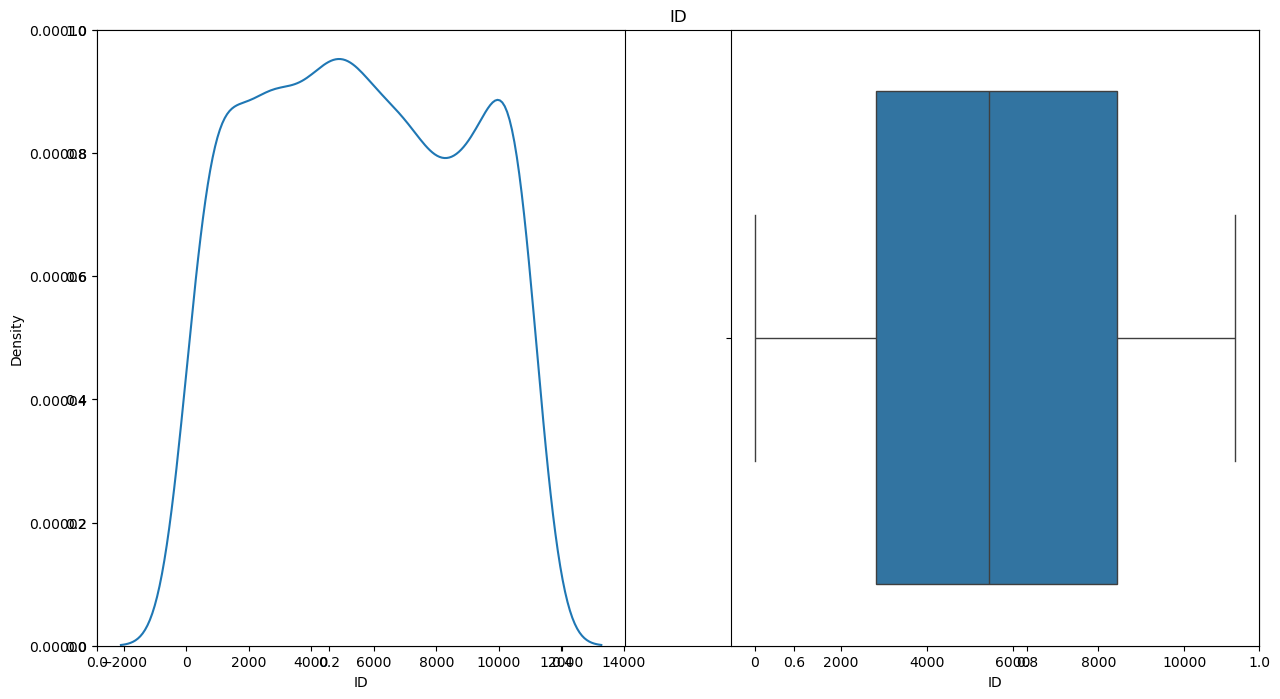

ID
Skewness: 0.04045921584396176
Kurtosis: -1.1896766776231371


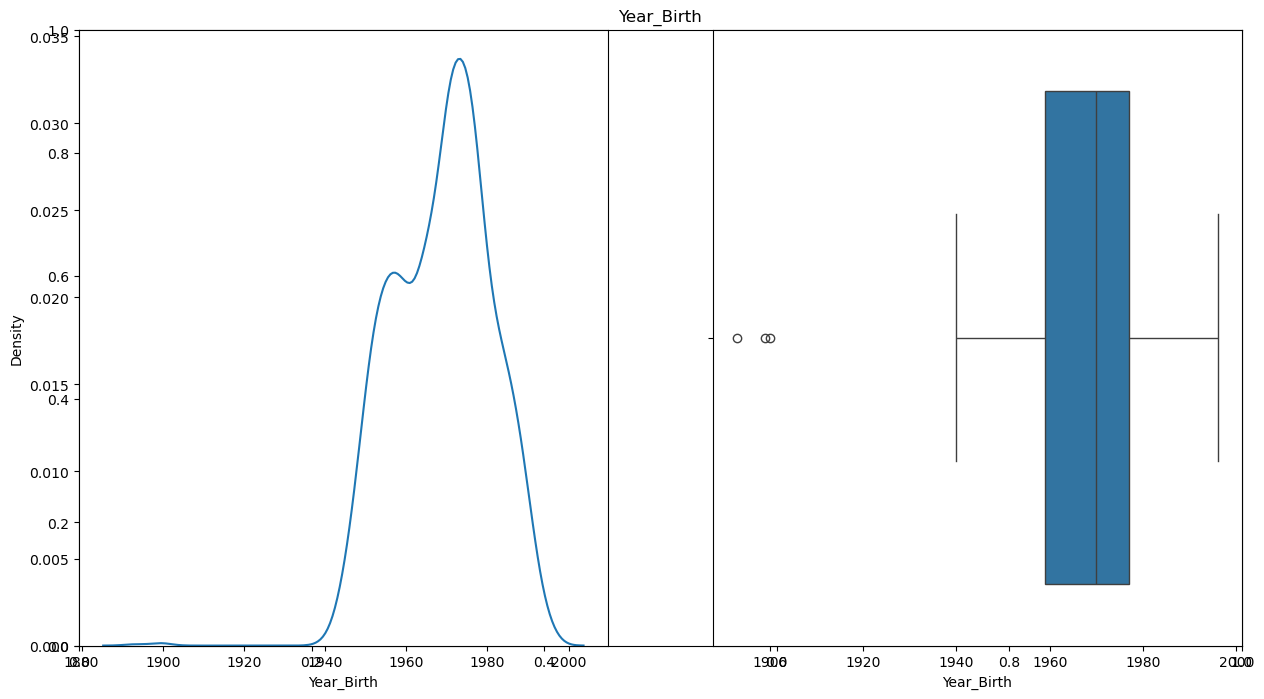

Year_Birth
Skewness: -0.3536614700288031
Kurtosis: 0.7346704420774341


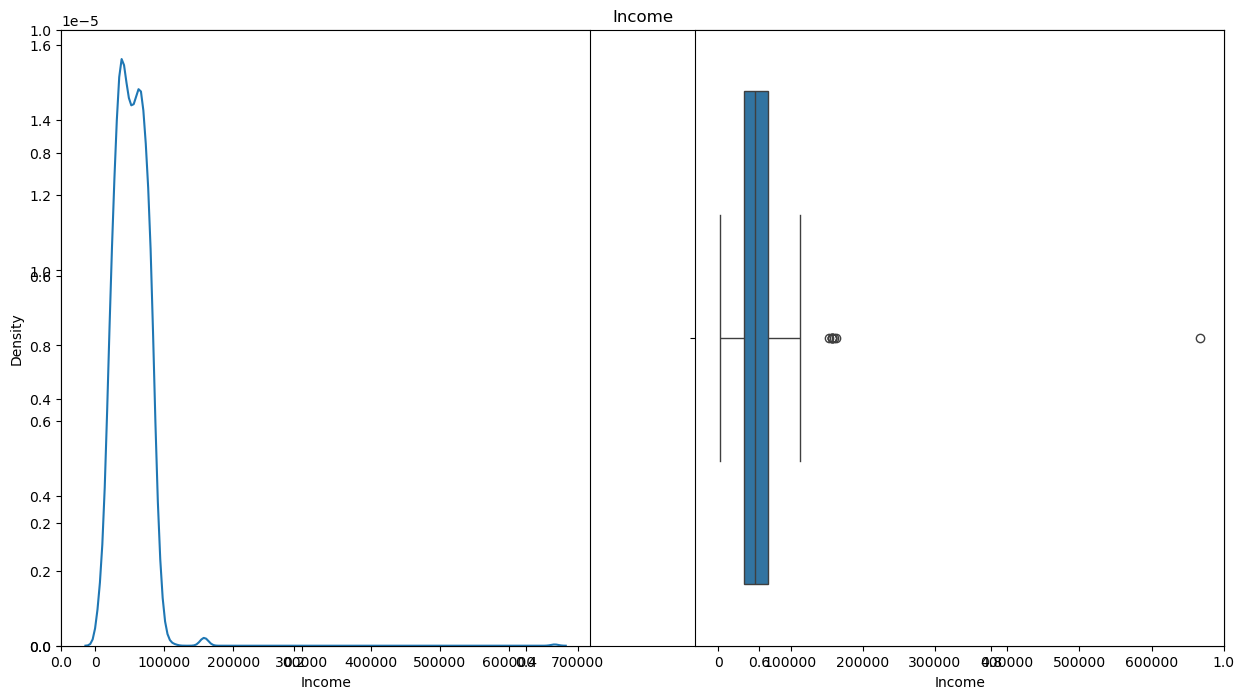

Income
Skewness: 6.7634873728111184
Kurtosis: 159.63669957780044


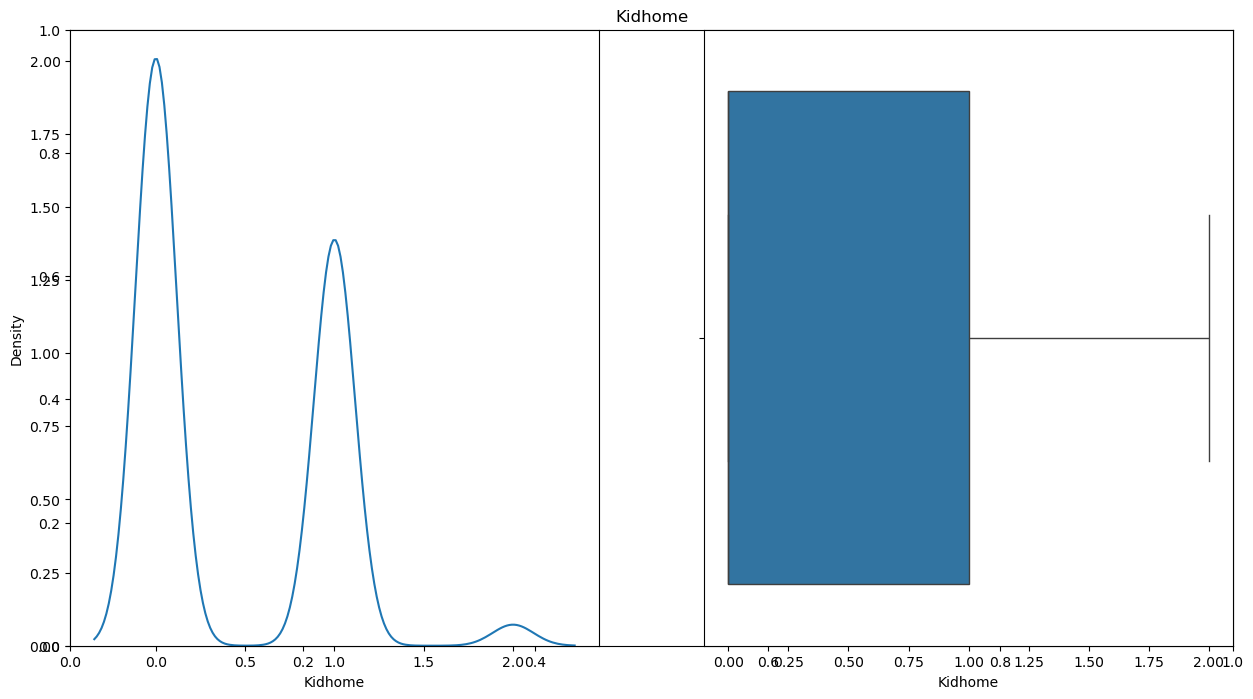

Kidhome
Skewness: 0.6356100646634026
Kurtosis: -0.7911638111664301


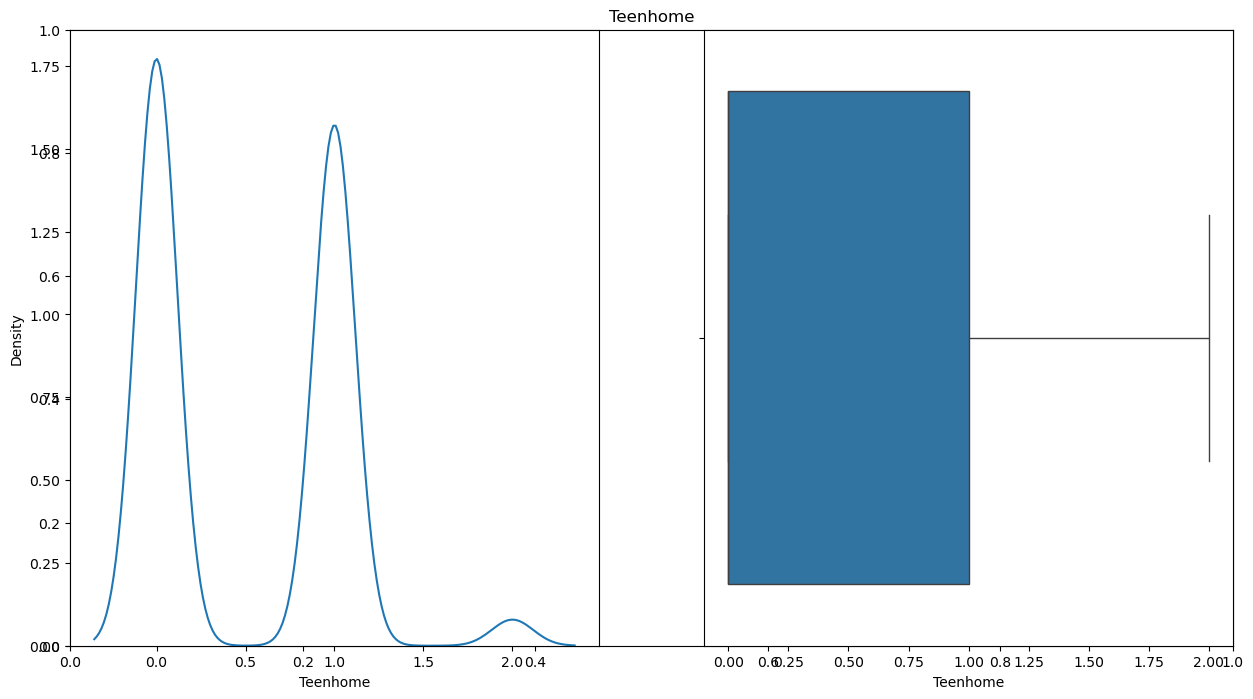

Teenhome
Skewness: 0.40755280239070707
Kurtosis: -0.9896186670749598


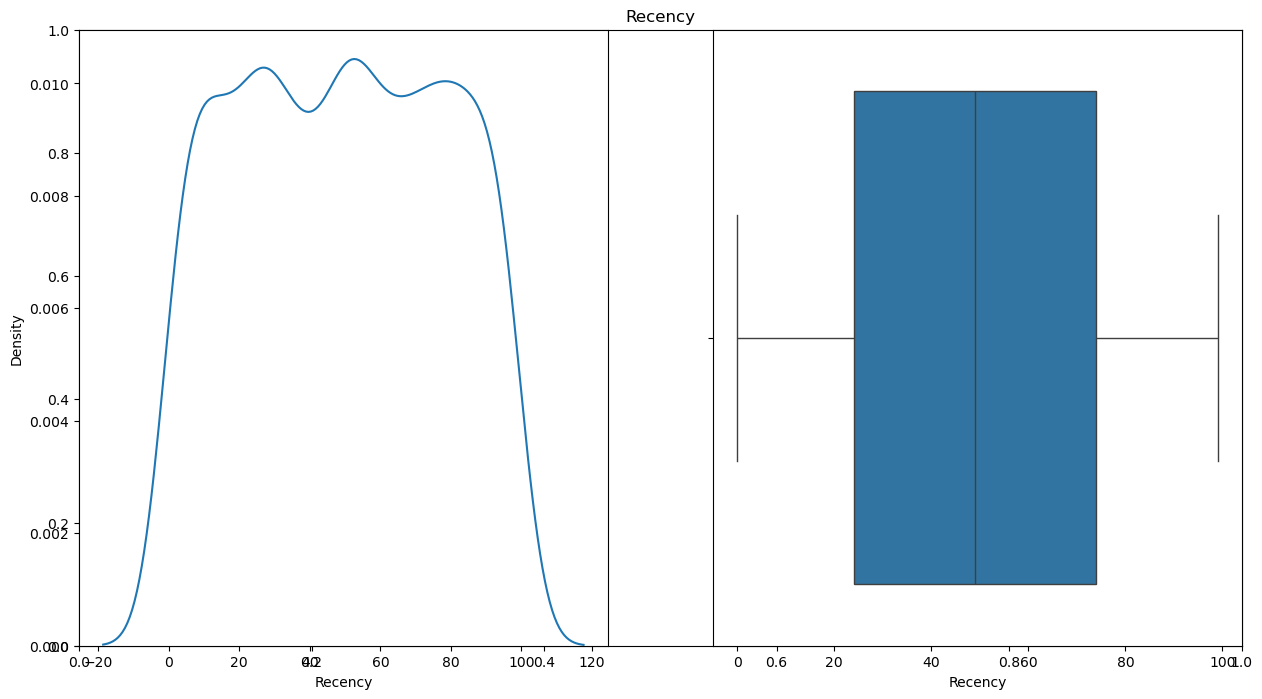

Recency
Skewness: 0.0016477067463847978
Kurtosis: -1.199776860736612


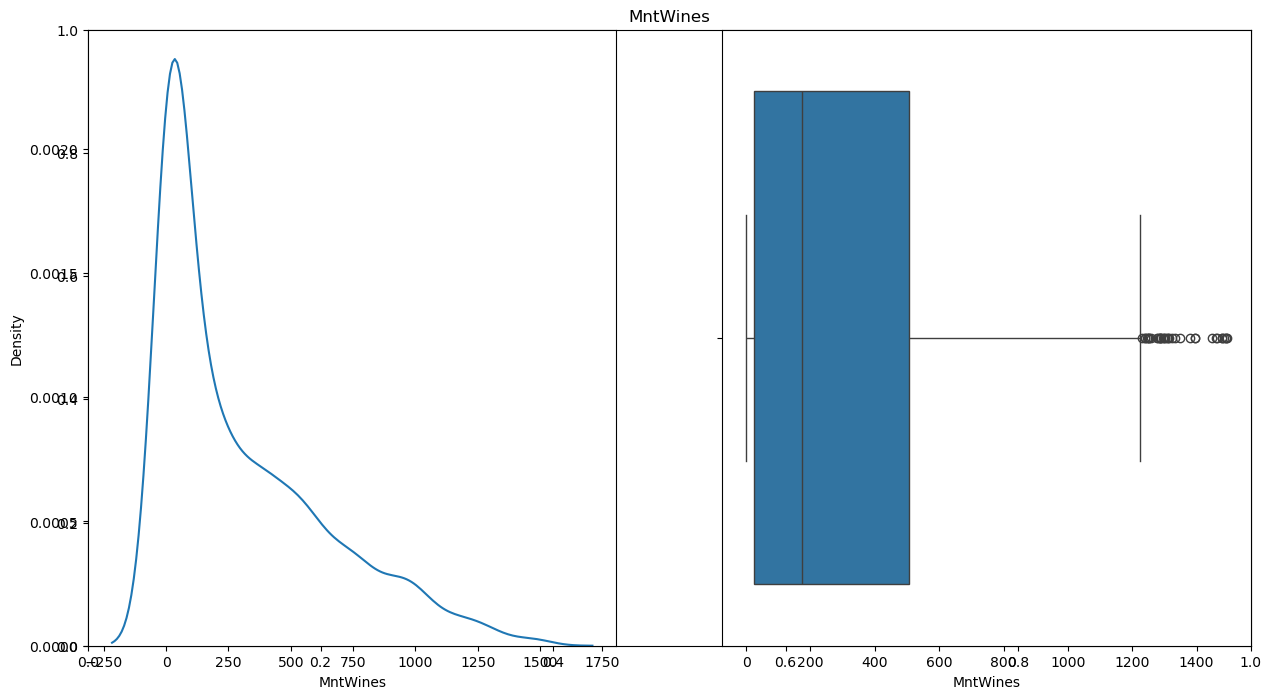

MntWines
Skewness: 1.1707200955543913
Kurtosis: 0.5827411213782012


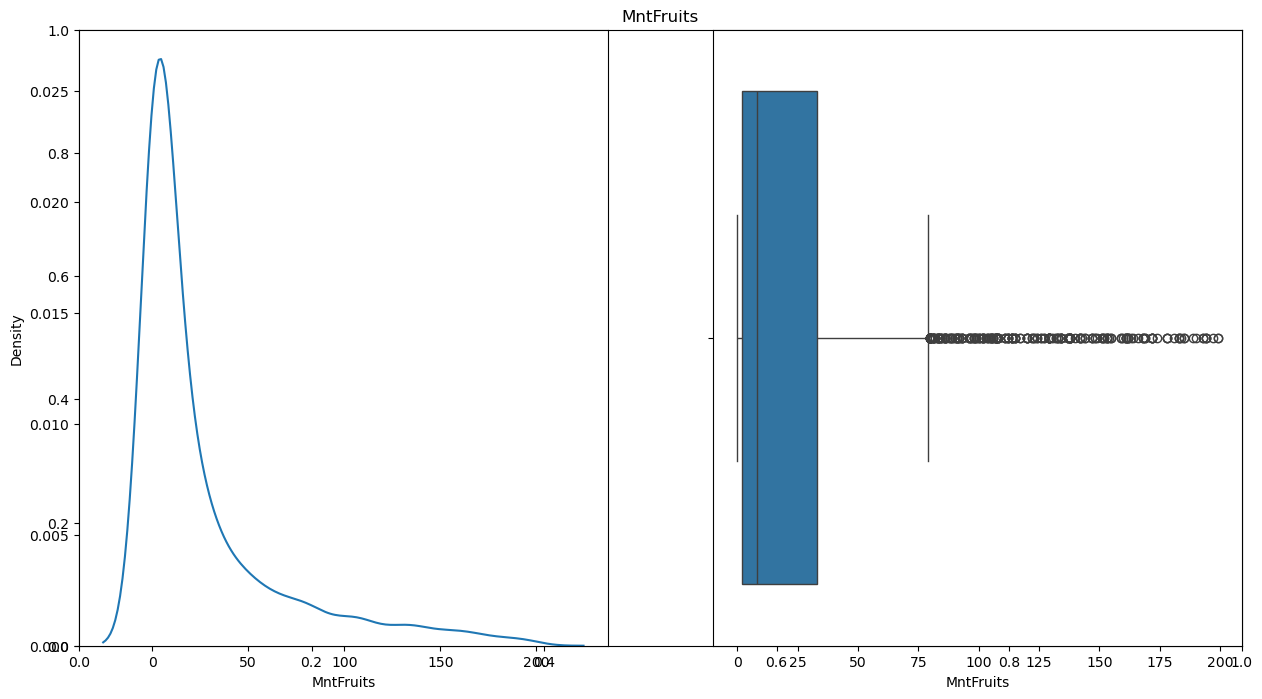

MntFruits
Skewness: 2.101657525150595
Kurtosis: 4.05408152559753


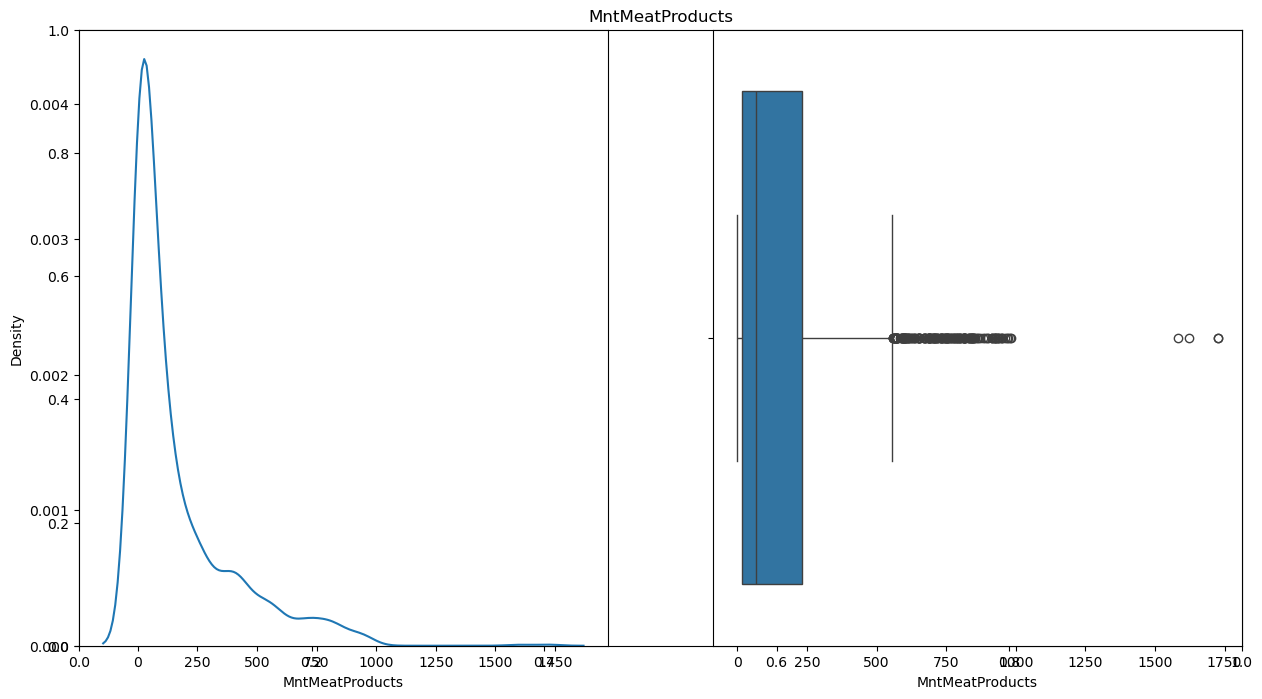

MntMeatProducts
Skewness: 2.0255768067844633
Kurtosis: 5.055476675925979


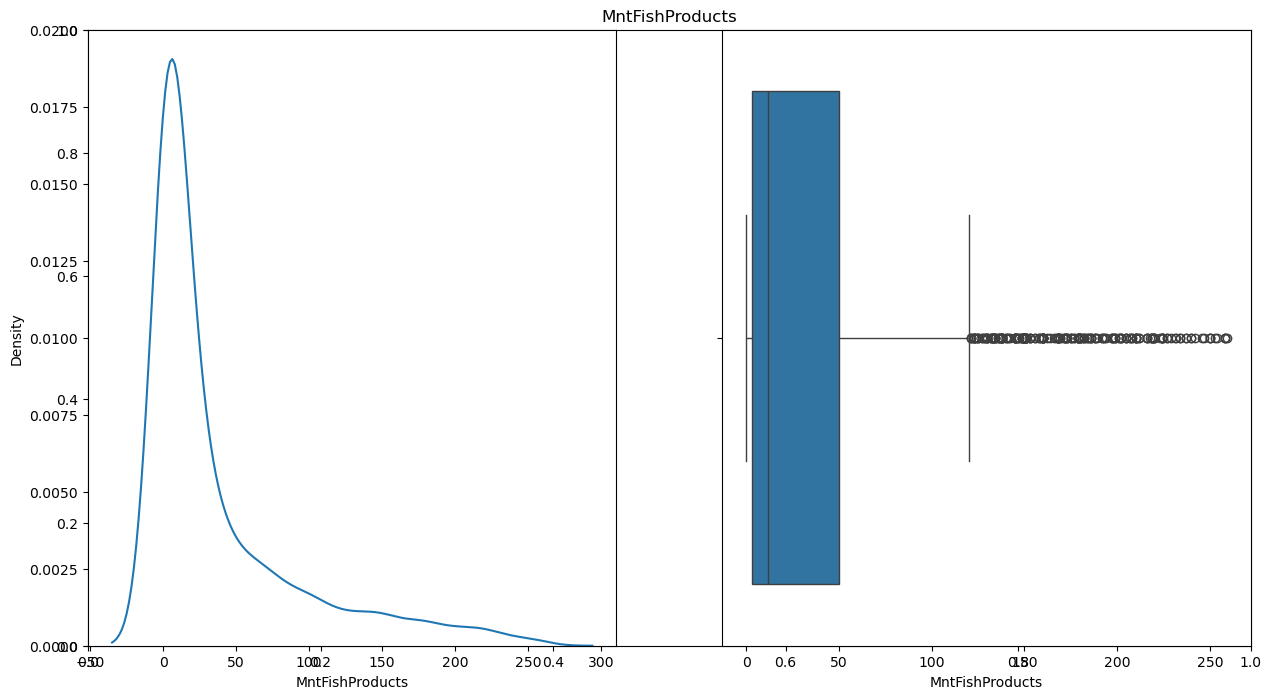

MntFishProducts
Skewness: 1.916368950232168
Kurtosis: 3.0764762986354275


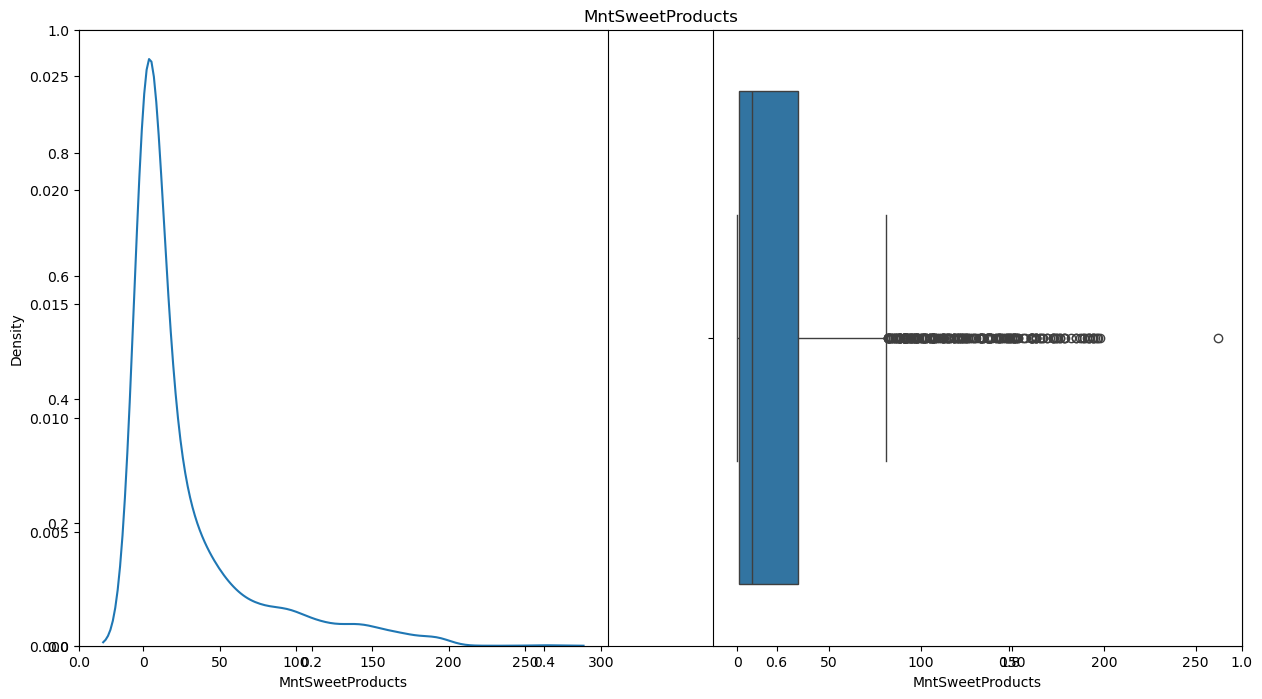

MntSweetProducts
Skewness: 2.1033275863706797
Kurtosis: 4.106140620240588


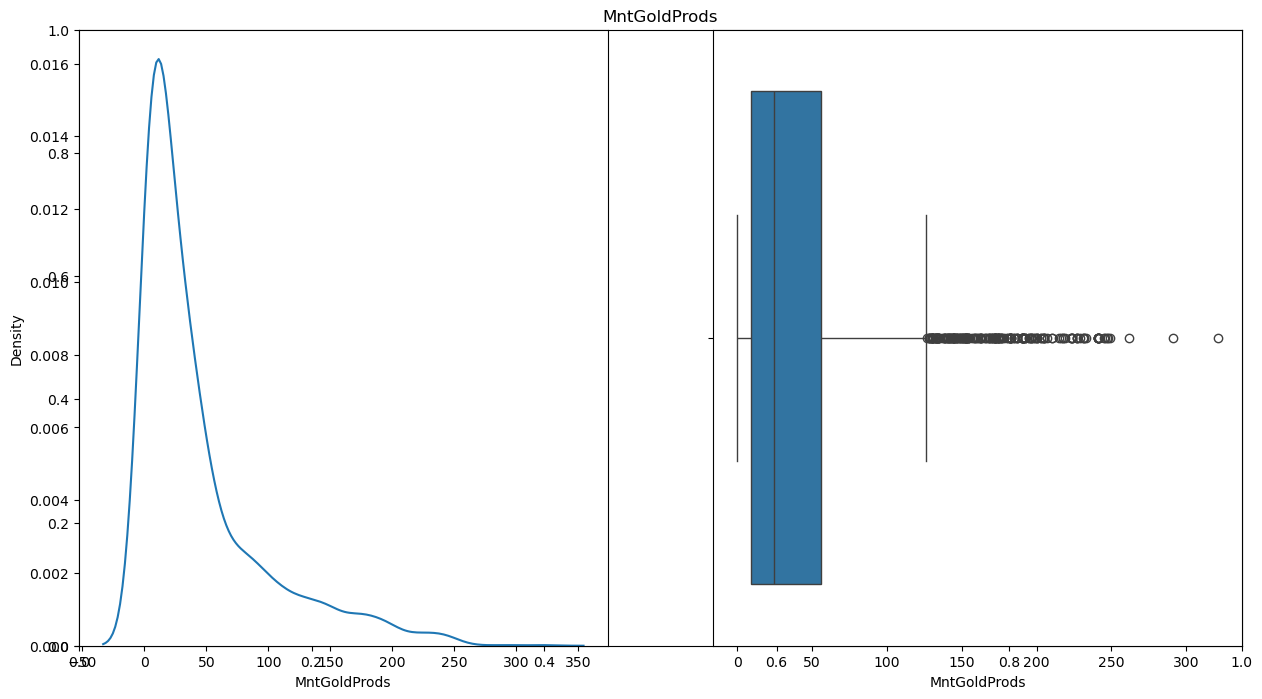

MntGoldProds
Skewness: 1.8392309361295713
Kurtosis: 3.1563418557924003


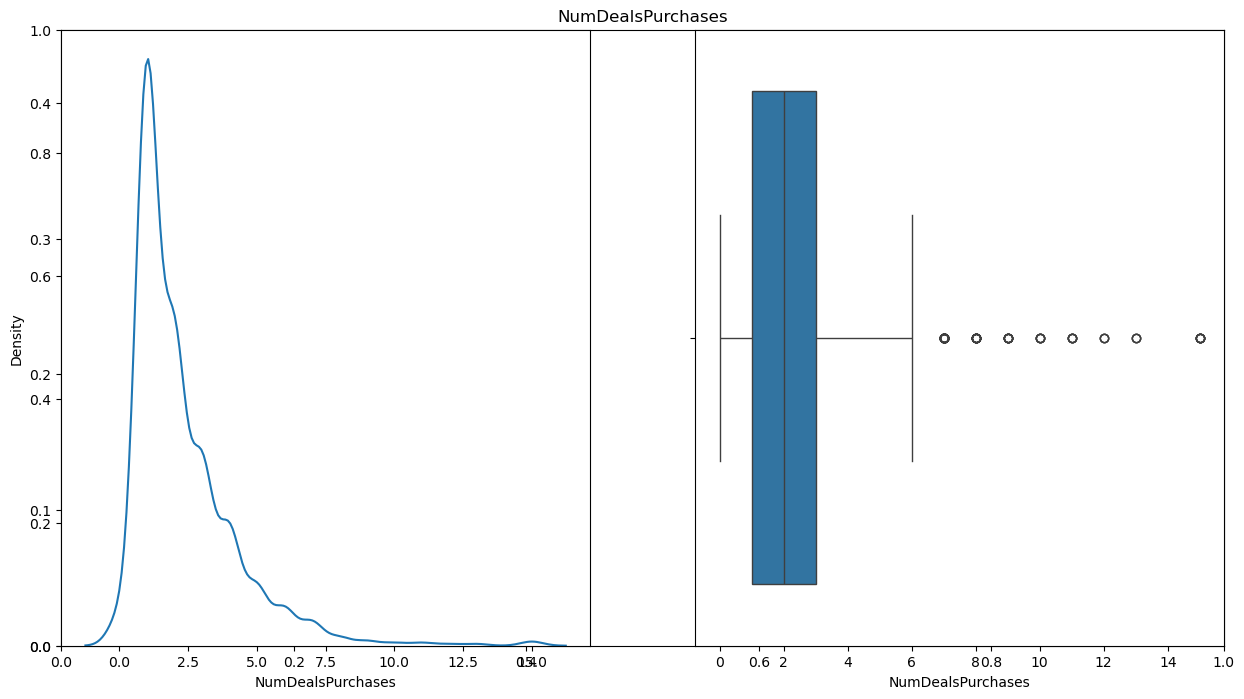

NumDealsPurchases
Skewness: 2.415271762315824
Kurtosis: 8.974490053367267


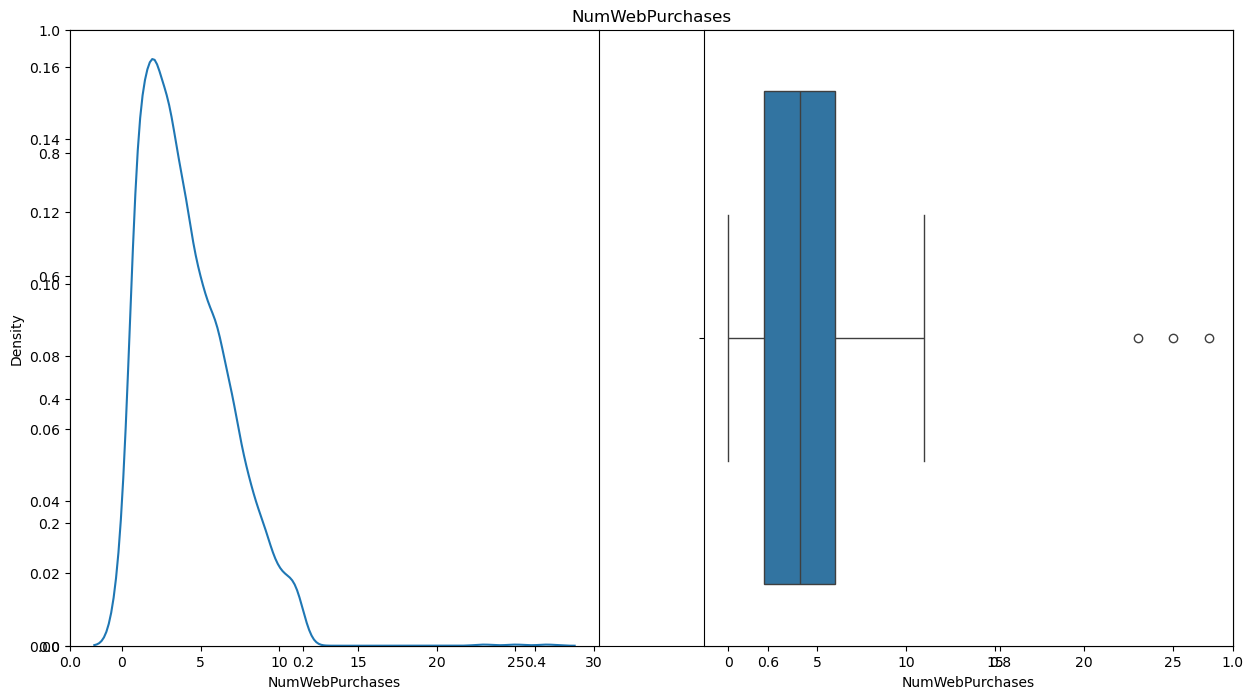

NumWebPurchases
Skewness: 1.1970370130708343
Kurtosis: 4.072136833911461


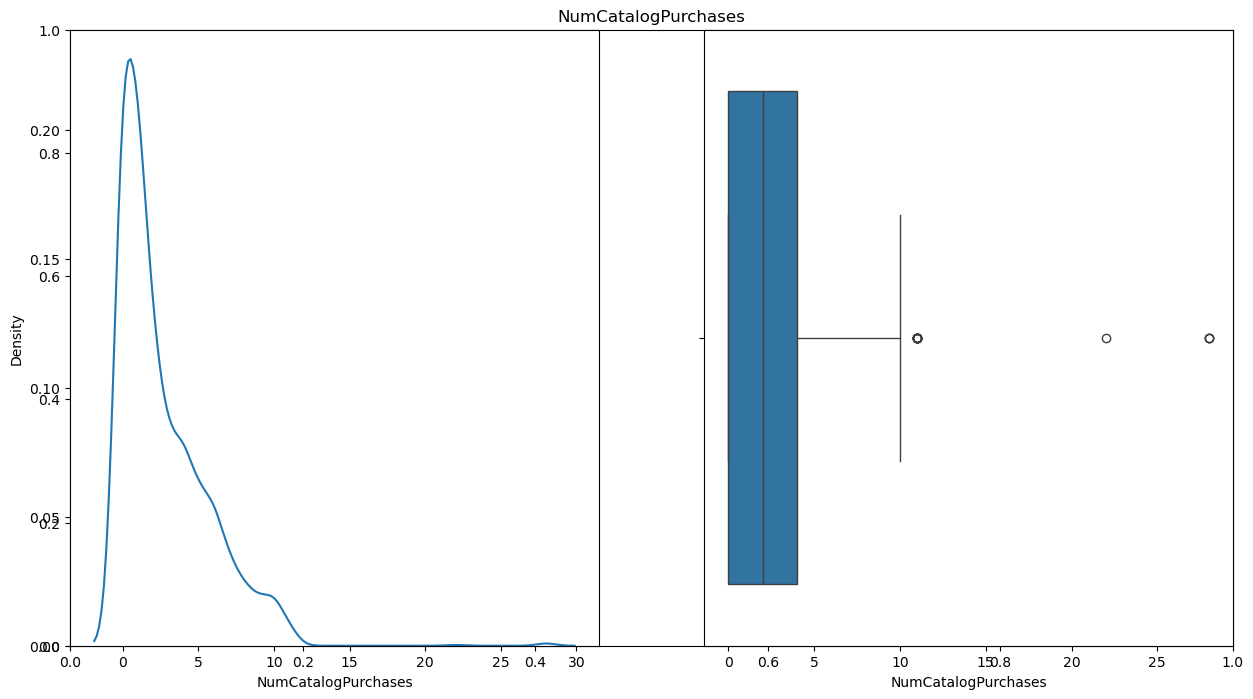

NumCatalogPurchases
Skewness: 1.8810750511540515
Kurtosis: 8.067126220076318


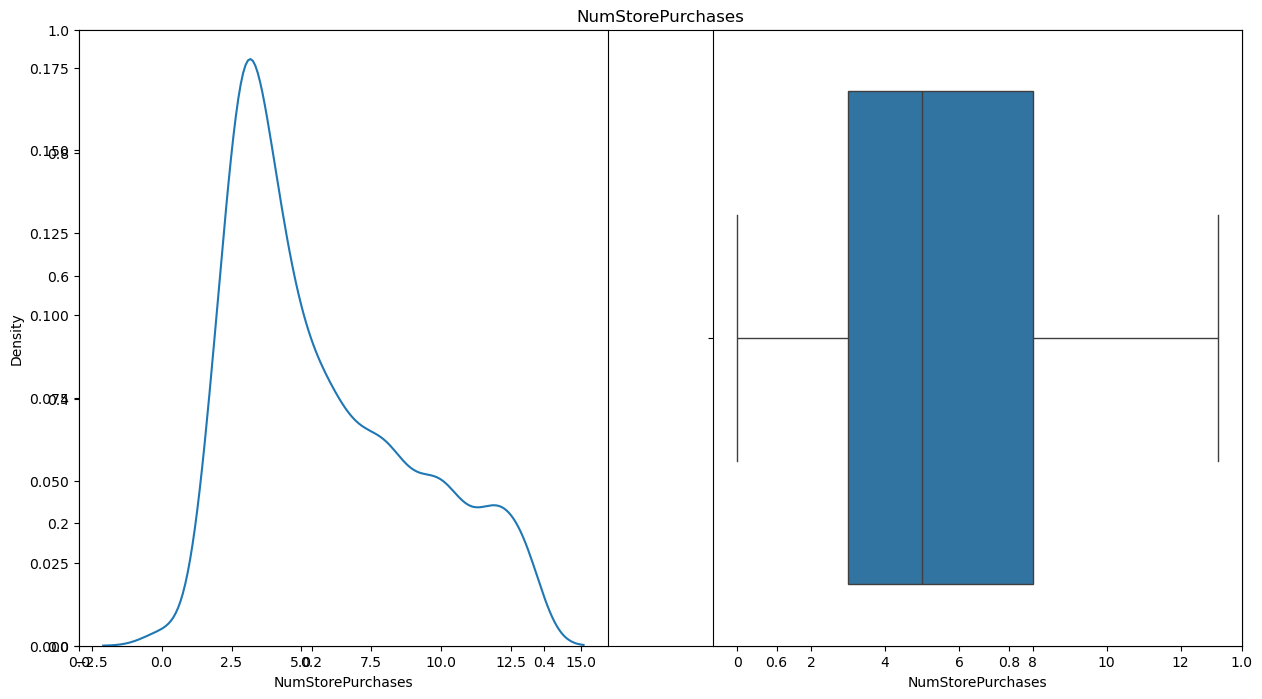

NumStorePurchases
Skewness: 0.7018262973284631
Kurtosis: -0.6264621905184886


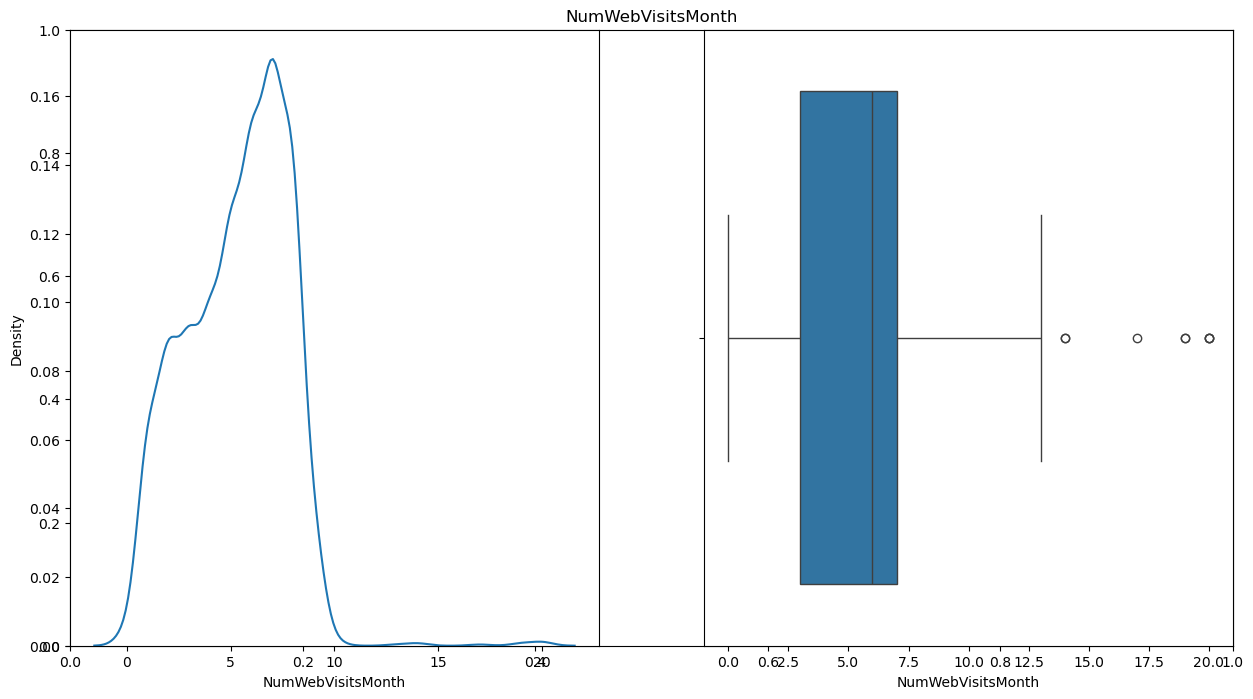

NumWebVisitsMonth
Skewness: 0.2180430456390019
Kurtosis: 1.8525766776944477


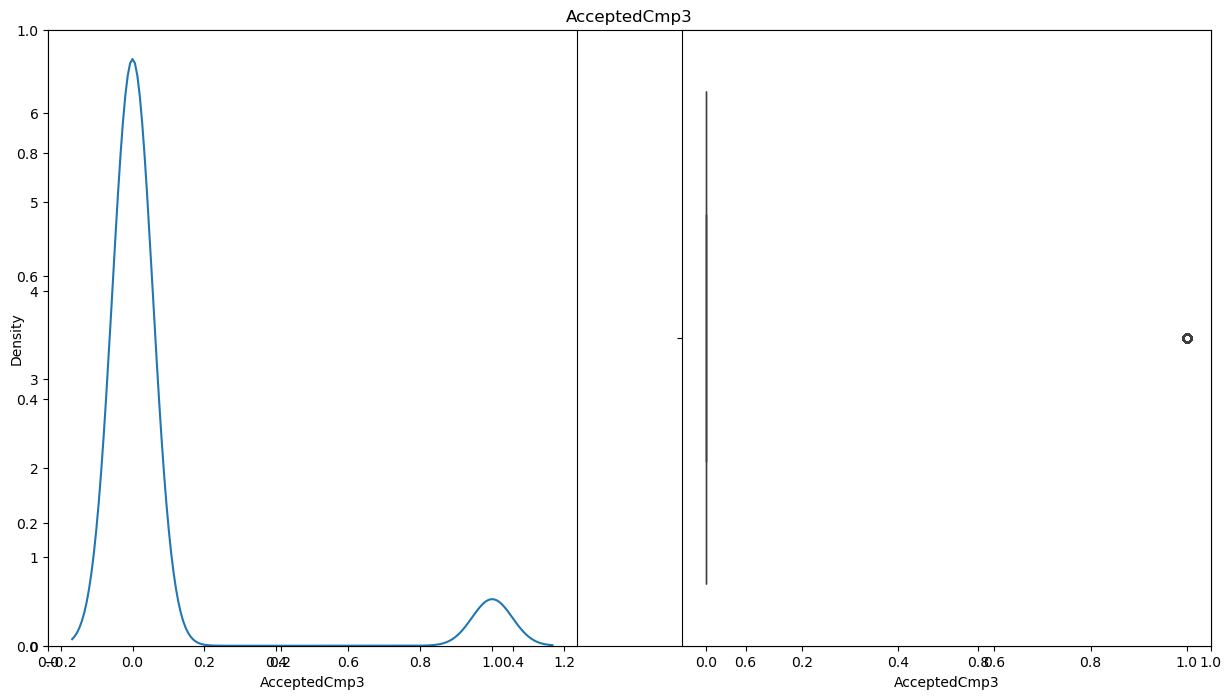

AcceptedCmp3
Skewness: 3.2693969568782
Kurtosis: 8.696804751680888


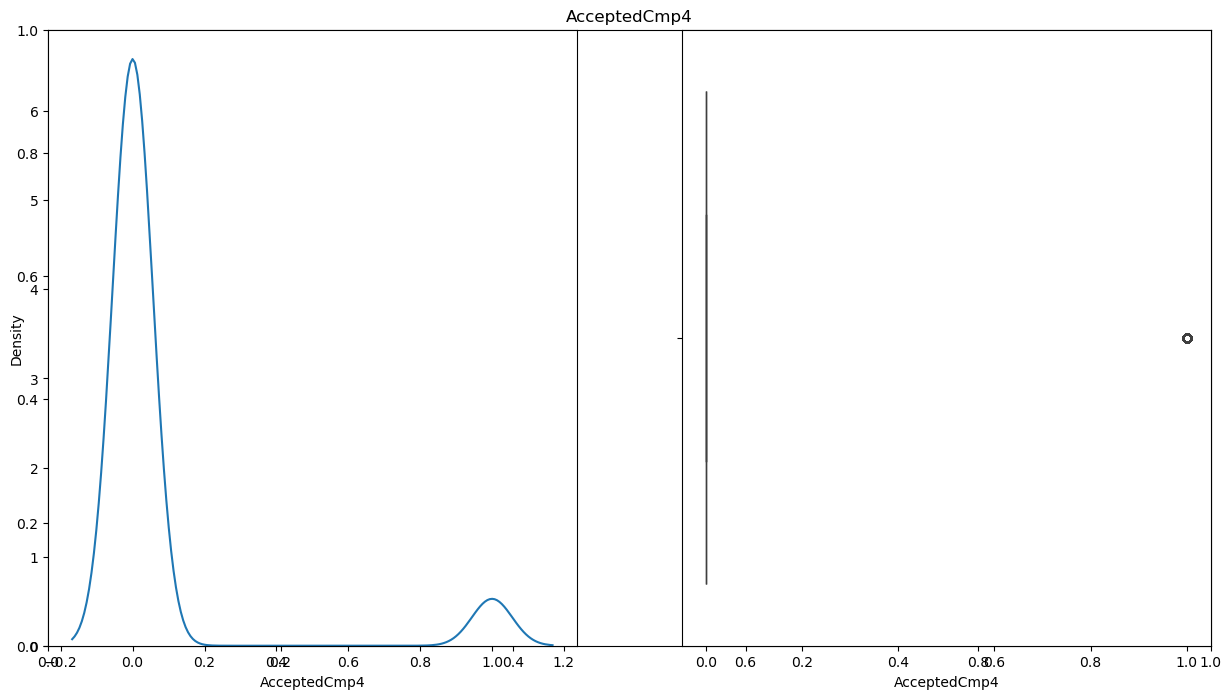

AcceptedCmp4
Skewness: 3.256758193853604
Kurtosis: 8.614247713276223


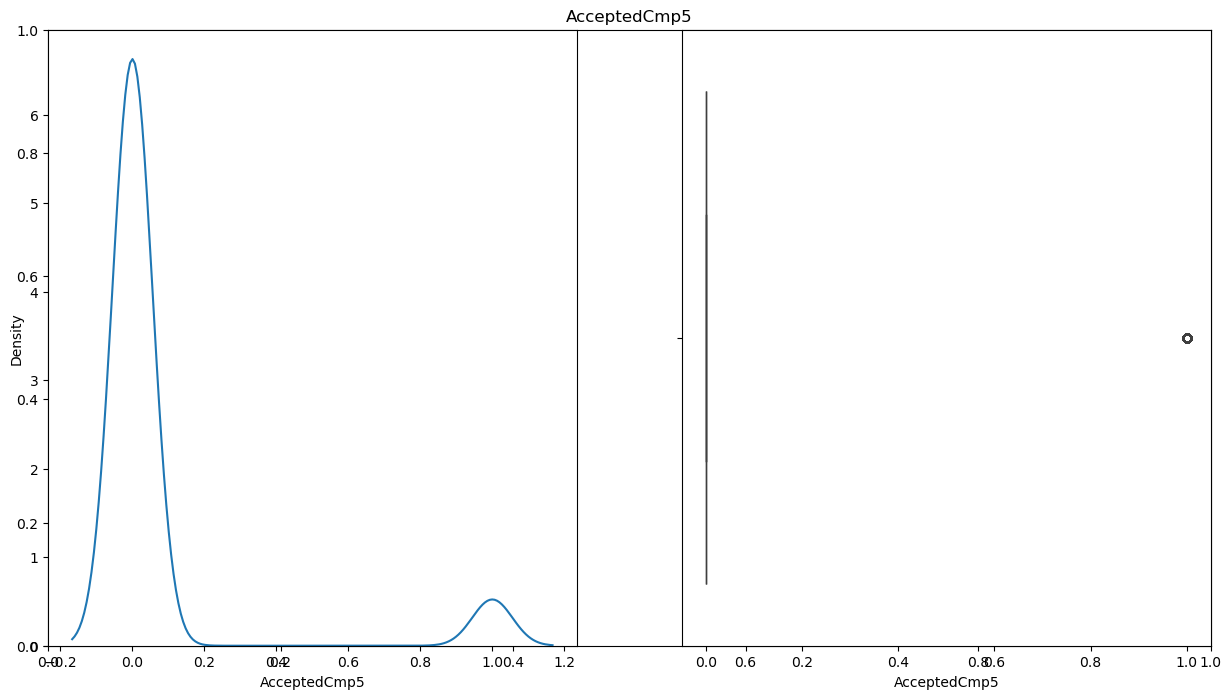

AcceptedCmp5
Skewness: 3.2821432492590605
Kurtosis: 8.780388034900207


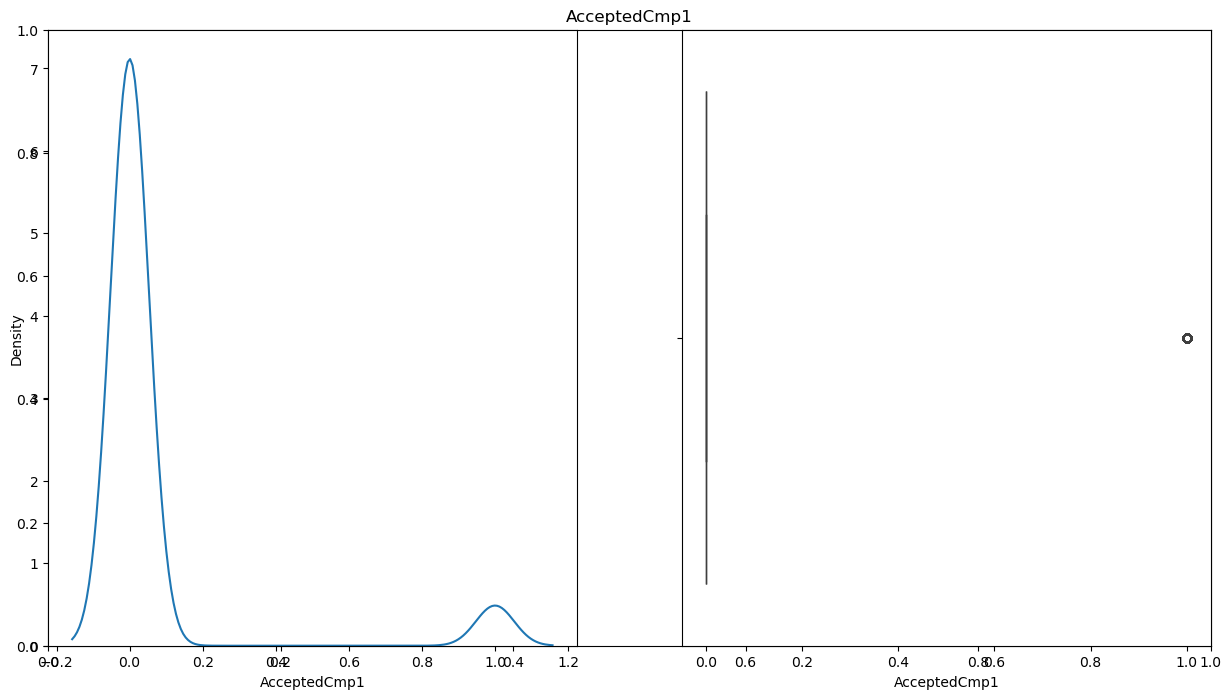

AcceptedCmp1
Skewness: 3.5624821800168314
Kurtosis: 10.700936356748002


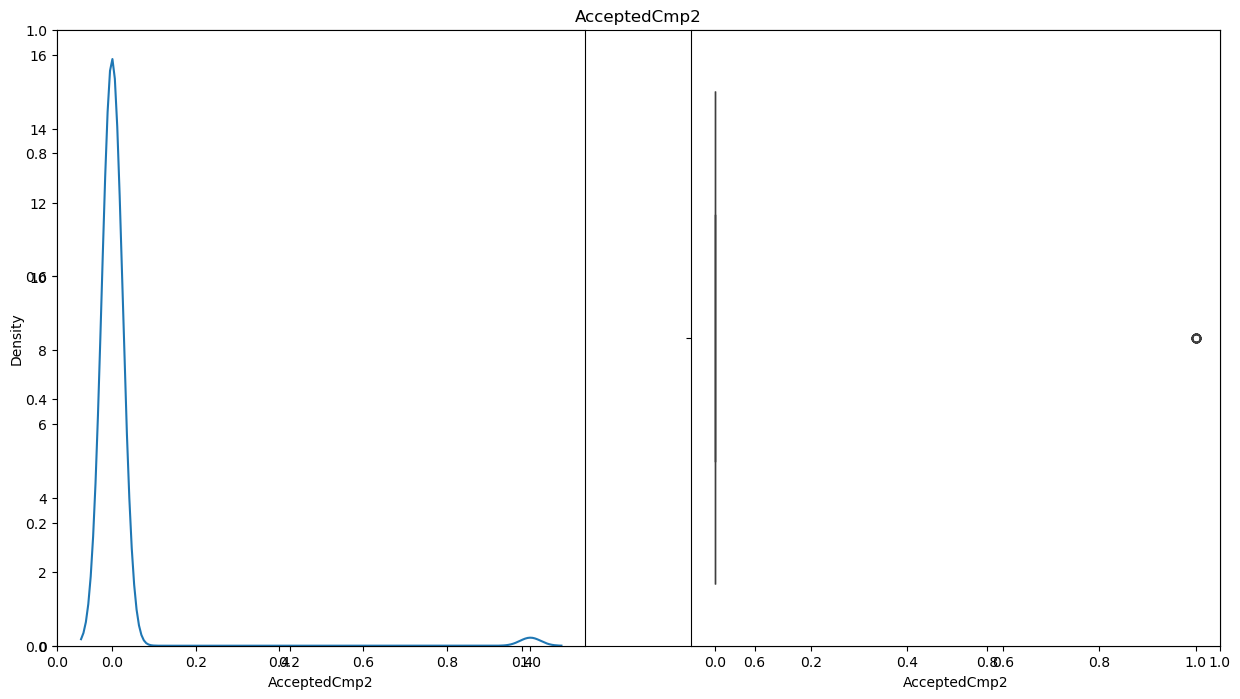

AcceptedCmp2
Skewness: 8.424753003647503
Kurtosis: 69.0387717437126


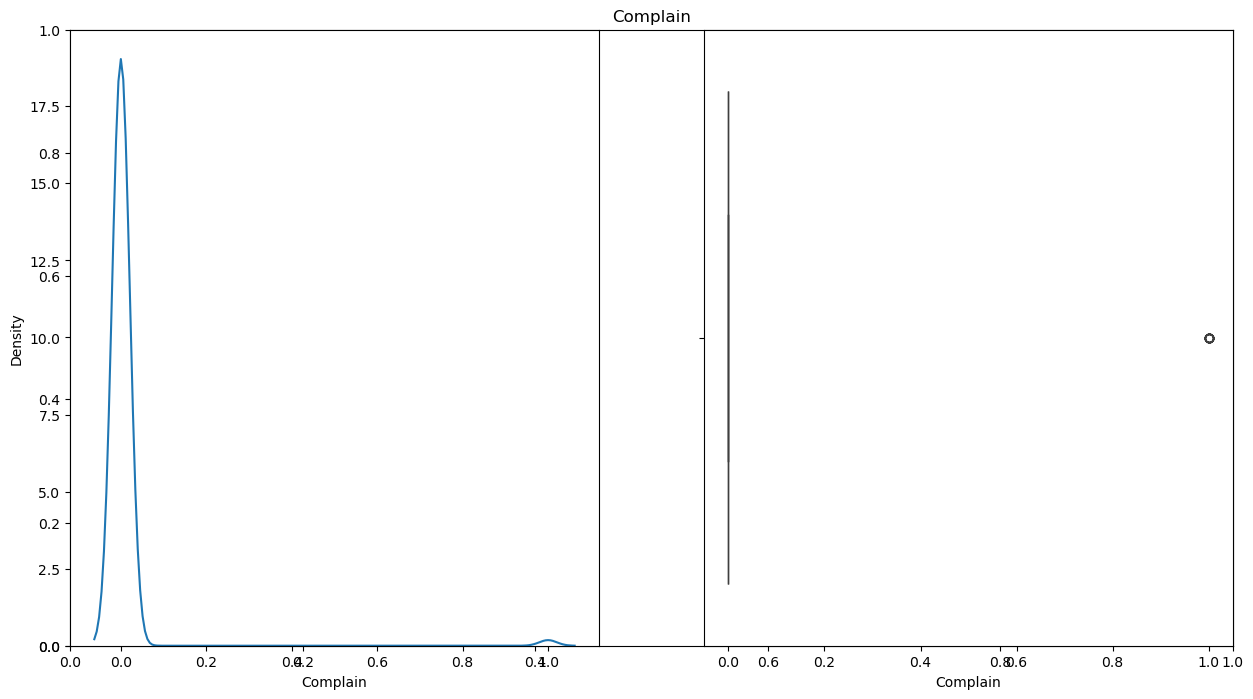

Complain
Skewness: 10.132736682249801
Kurtosis: 100.76329349456955


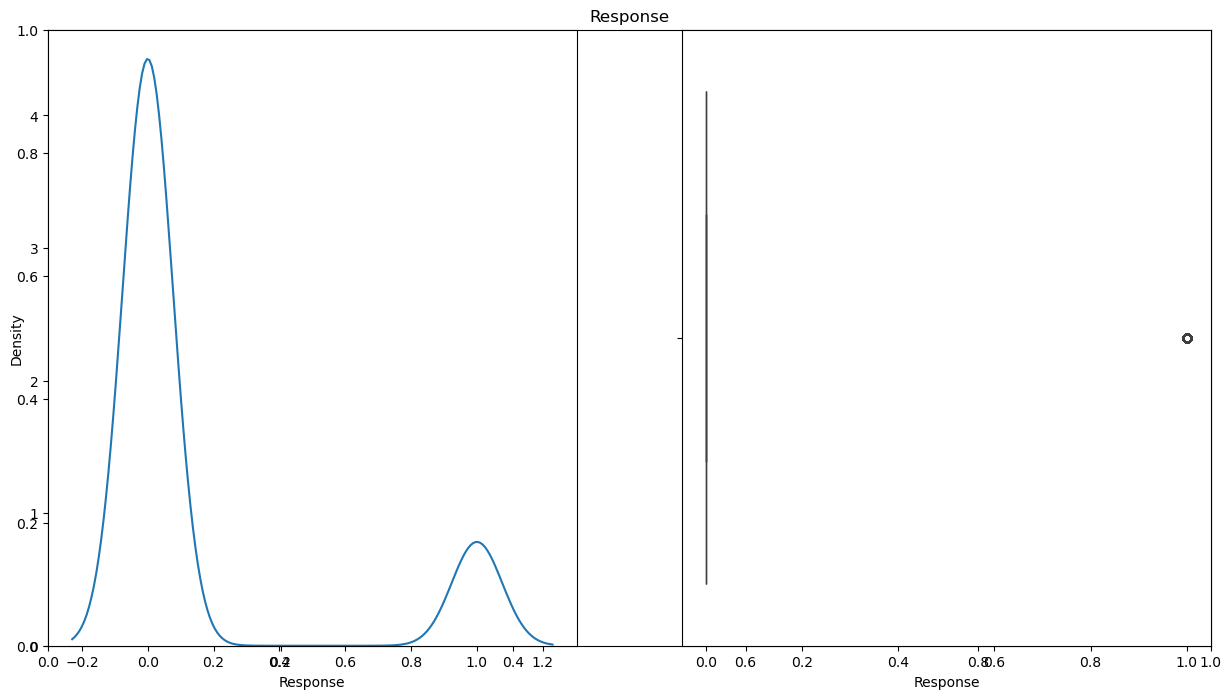

Response
Skewness: 1.9587479194384483
Kurtosis: 1.8383517598954673


In [16]:
# Outlier Detection
for i in df.select_dtypes(np.number).columns:
    plt.figure(figsize=[15,8])
    plt.title(i)
    plt.subplot(1,2,1)
    sns.kdeplot(x=df[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    plt.show()
    print(i)
    print('Skewness:',df[i].skew())
    print('Kurtosis:',df[i].kurt())

Year_Brith:
The Year_Birth distribution appears reasonably normal with no strong evidence of outliers.

Income:
Income exhibited extreme right skewness (6.76) and very high kurtosis (159.6), indicating significant outliers.

Product-related columns:
Product-related columns such as MntFruits, MntMeatProducts, MntSweetProducts, and MntGoldProds also showed heavy skewness and long tails.

Purchase behavior columns:
Purchase behavior features like NumDealsPurchases and NumCatalogPurchases had high skewness and kurtosis as well.

### Outlier Treatment

In [17]:
# Columns to log transform (highly skewed, positive values only)

log_transform_cols = ['Income', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts','MntWines','NumWebVisitsMonth']

#Apply
for i in log_transform_cols:
    df[i] = np.log1p(df[i]) 

In [18]:
#Columns to apply IQR capping

iqr_capping_cols = [ 'MntFishProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases']


def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Apply
for i in iqr_capping_cols:
    cap_outliers_iqr(df,i)

Treatment :

Log Transformation (np.log1p):
* Log Transformation was applied to highly skewed and positively-valued features (e.g., Income, MntFruits, MntMeatProducts, MntSweetProducts) to reduce skewness and normalize the distribution.

IQR Capping (Winsorization):
* IQR Capping was applied to moderate skewed variables with extreme values (e.g., MntFishProducts, MntGoldProds, NumDealsPurchases, NumCatalogPurchases) to limit the influence of outliers while preserving the scale of the data.

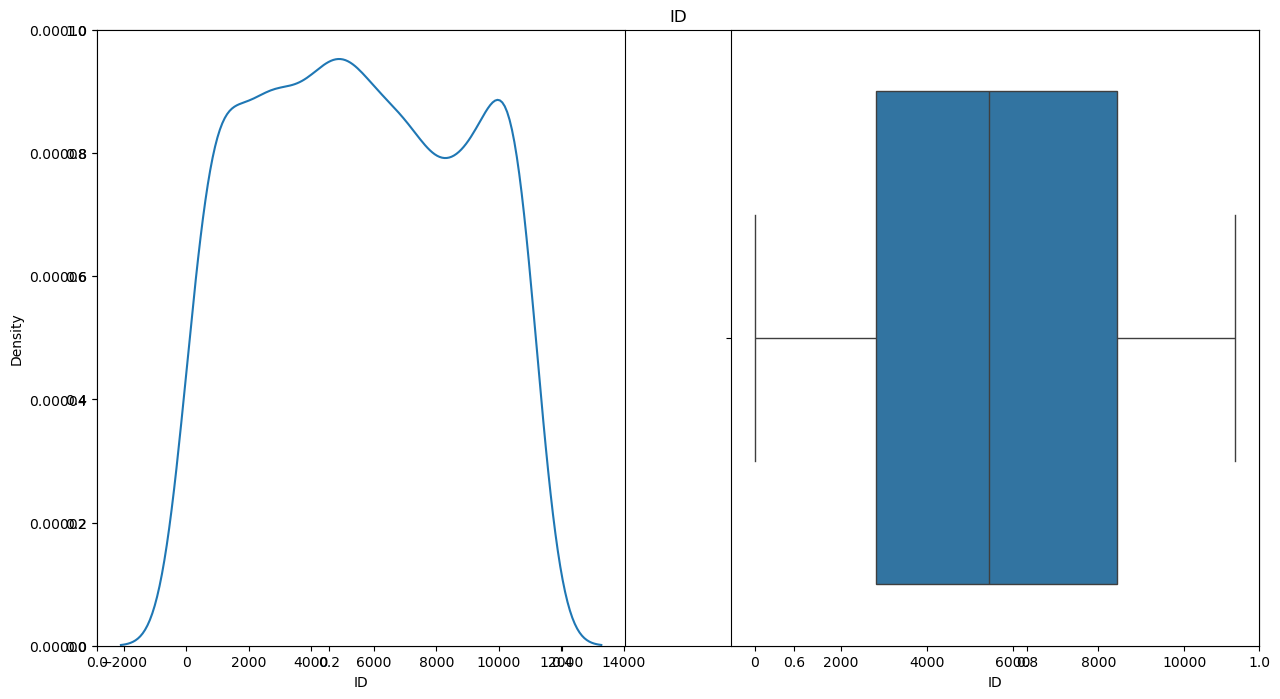

ID
Skewness: 0.04045921584396176
Kurtosis: -1.1896766776231371


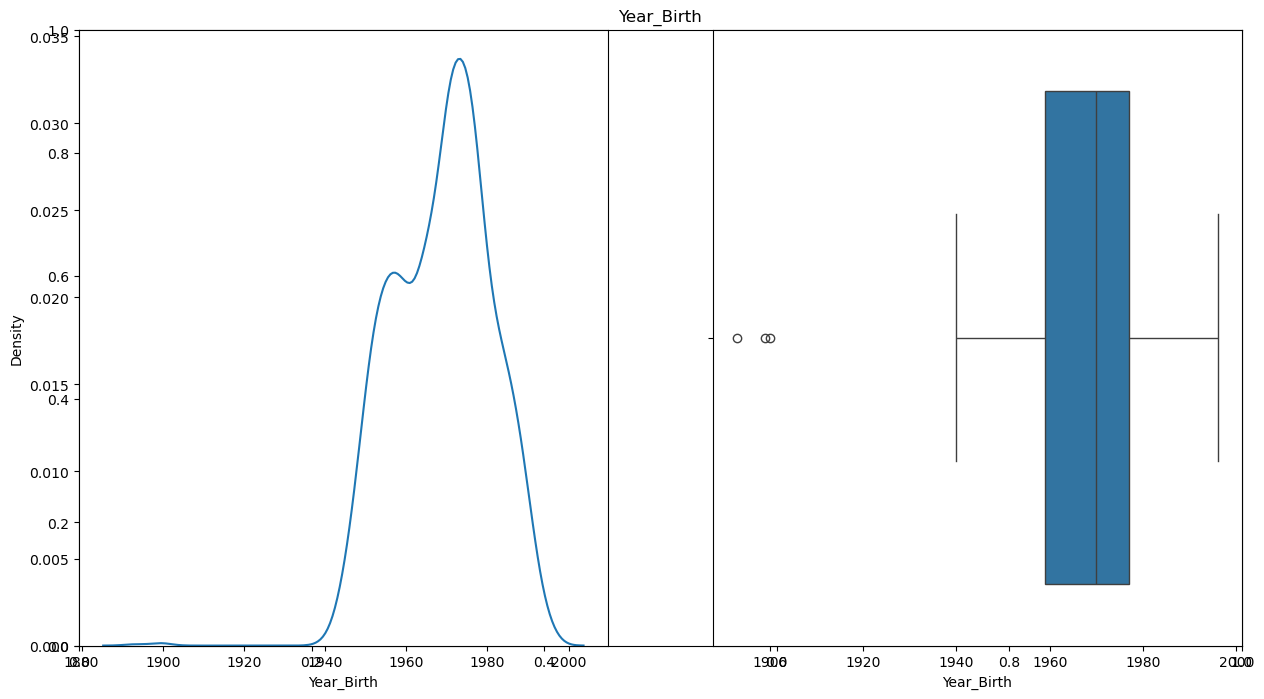

Year_Birth
Skewness: -0.3536614700288031
Kurtosis: 0.7346704420774341


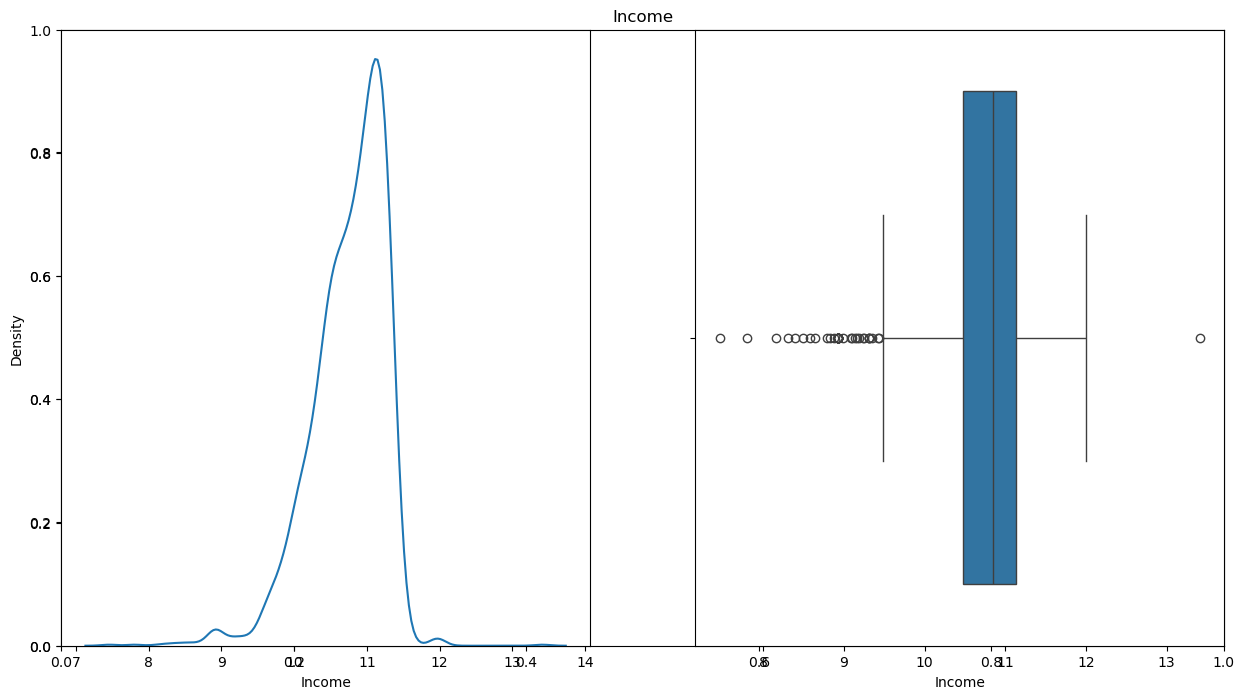

Income
Skewness: -1.1679522203567398
Kurtosis: 3.1798919110125587


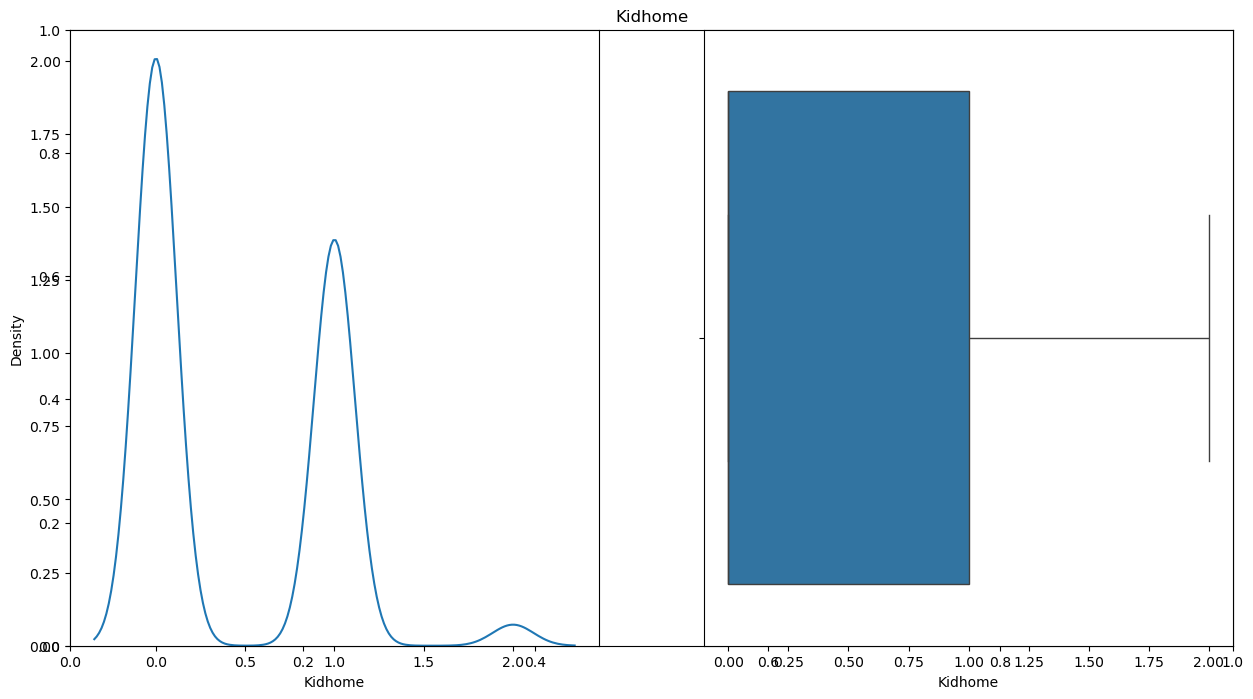

Kidhome
Skewness: 0.6356100646634026
Kurtosis: -0.7911638111664301


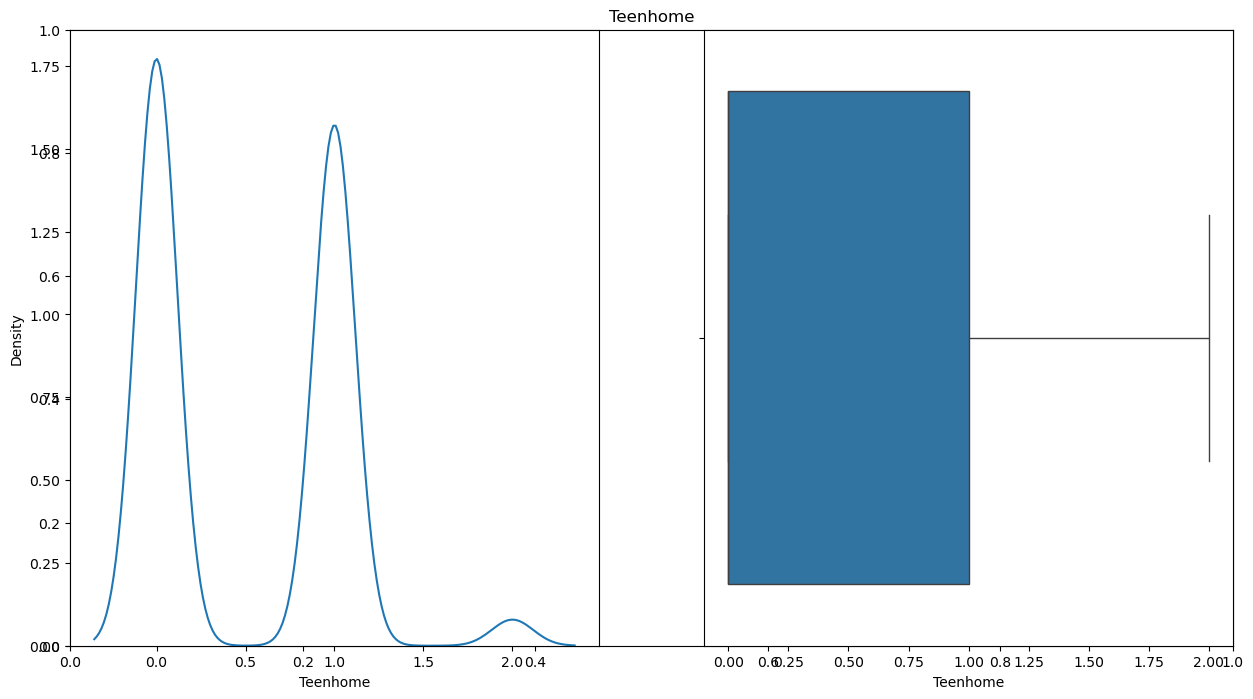

Teenhome
Skewness: 0.40755280239070707
Kurtosis: -0.9896186670749598


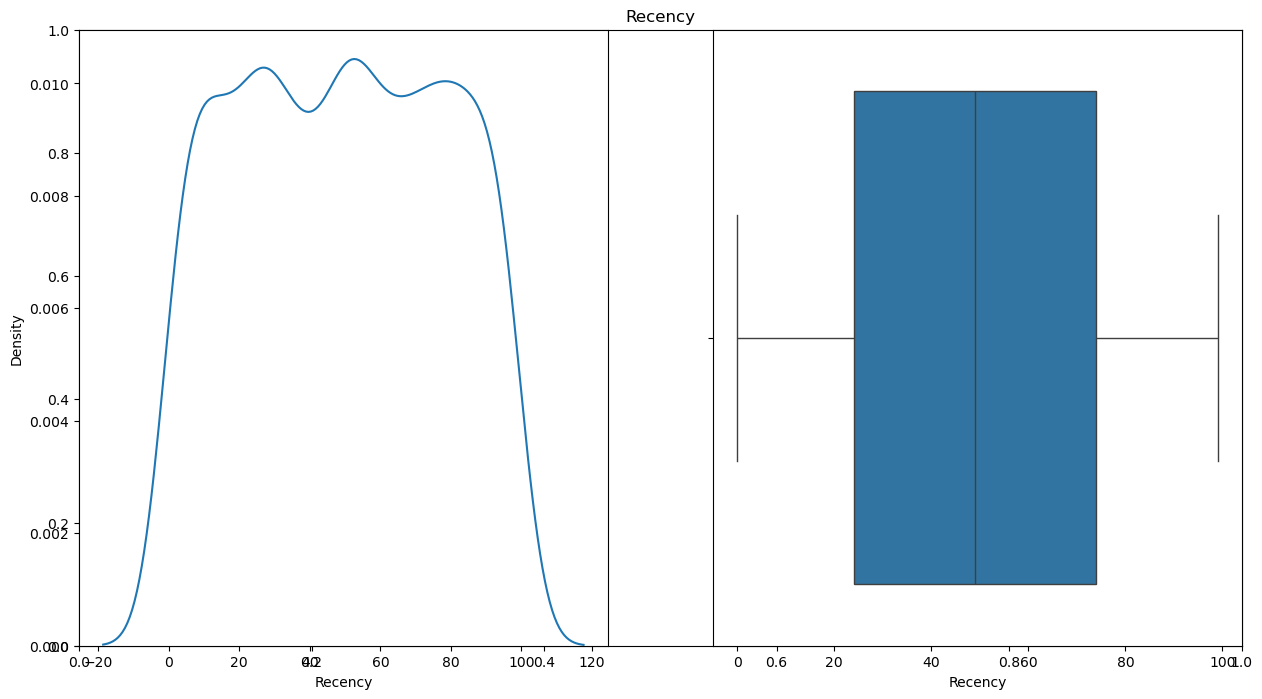

Recency
Skewness: 0.0016477067463847978
Kurtosis: -1.199776860736612


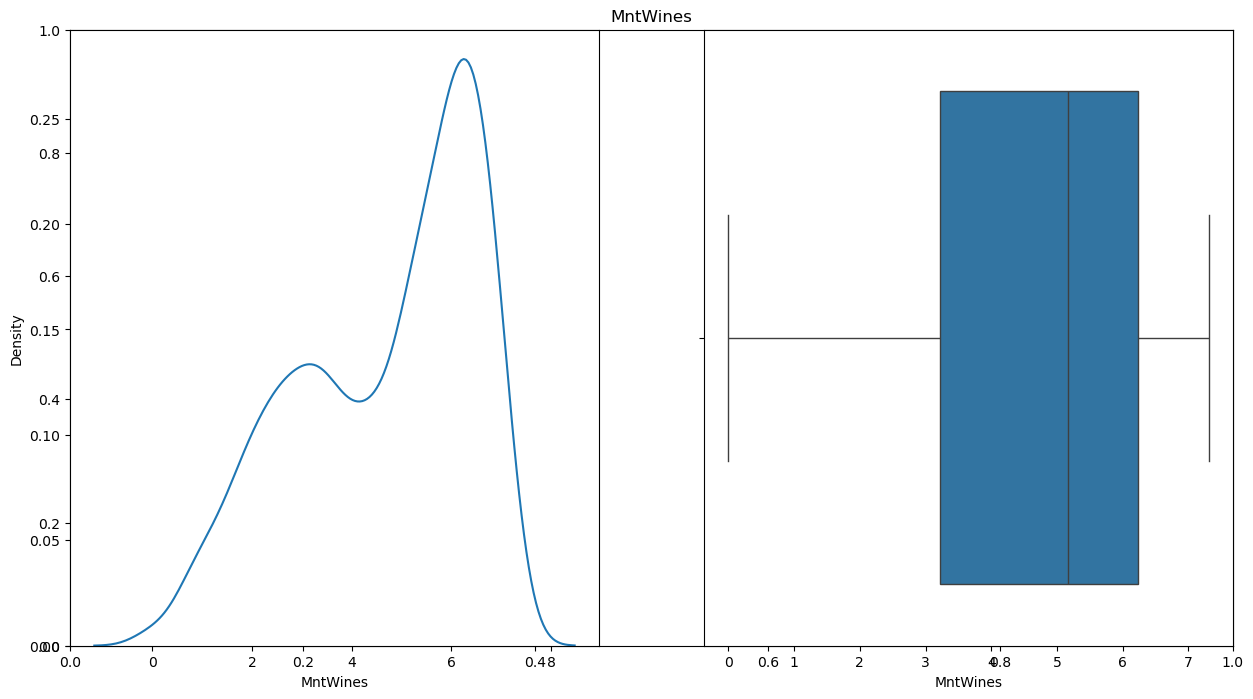

MntWines
Skewness: -0.5519280550220022
Kurtosis: -0.8359782598381611


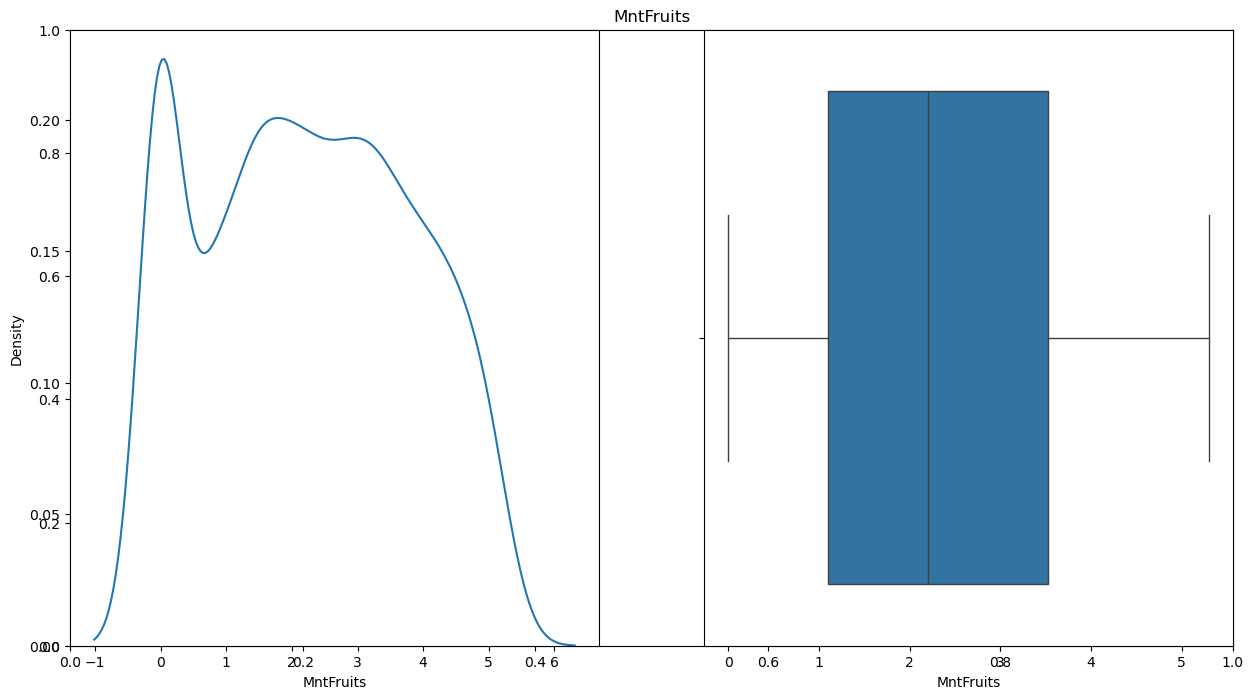

MntFruits
Skewness: 0.07894666903058452
Kurtosis: -1.1264249392880954


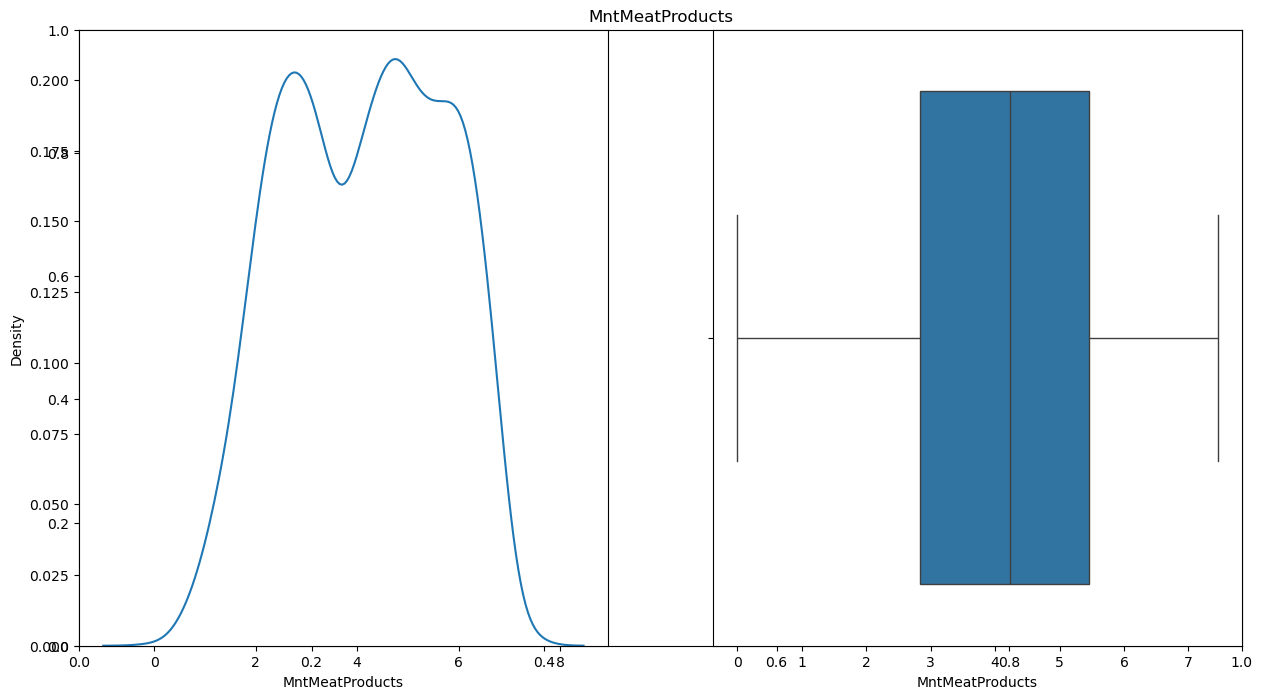

MntMeatProducts
Skewness: -0.08955687097658196
Kurtosis: -1.0545210648869245


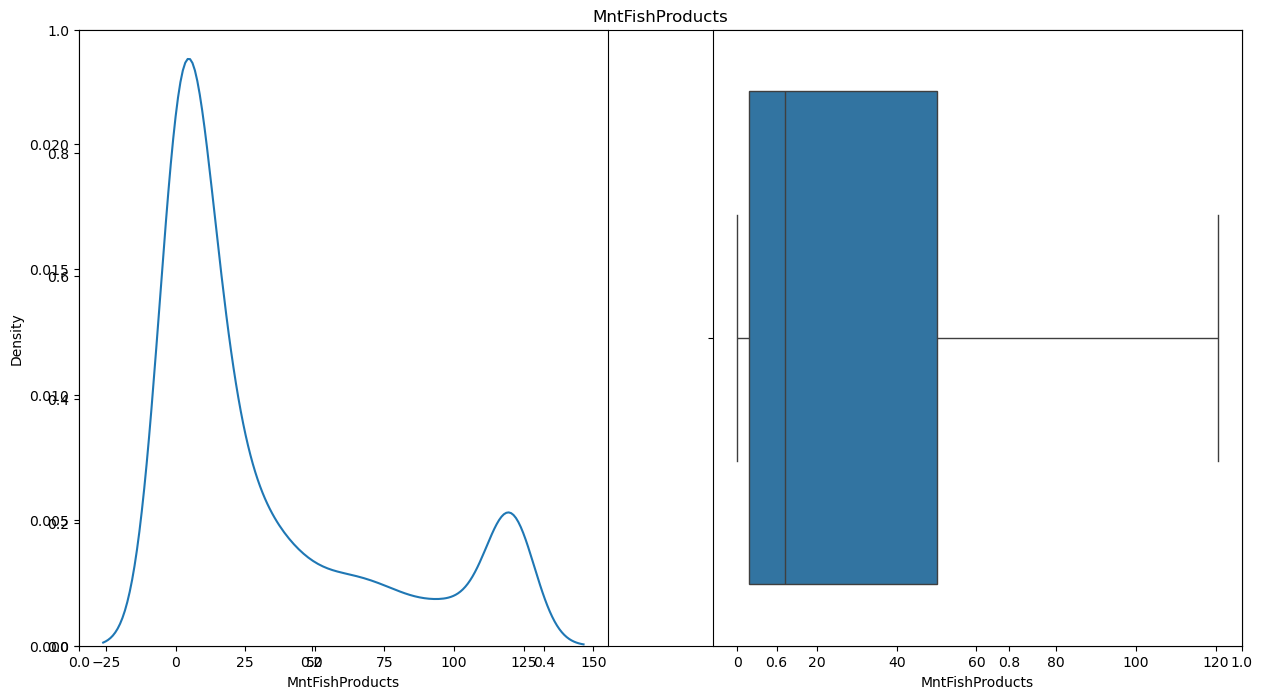

MntFishProducts
Skewness: 1.2281563564635758
Kurtosis: 0.05888769423154949


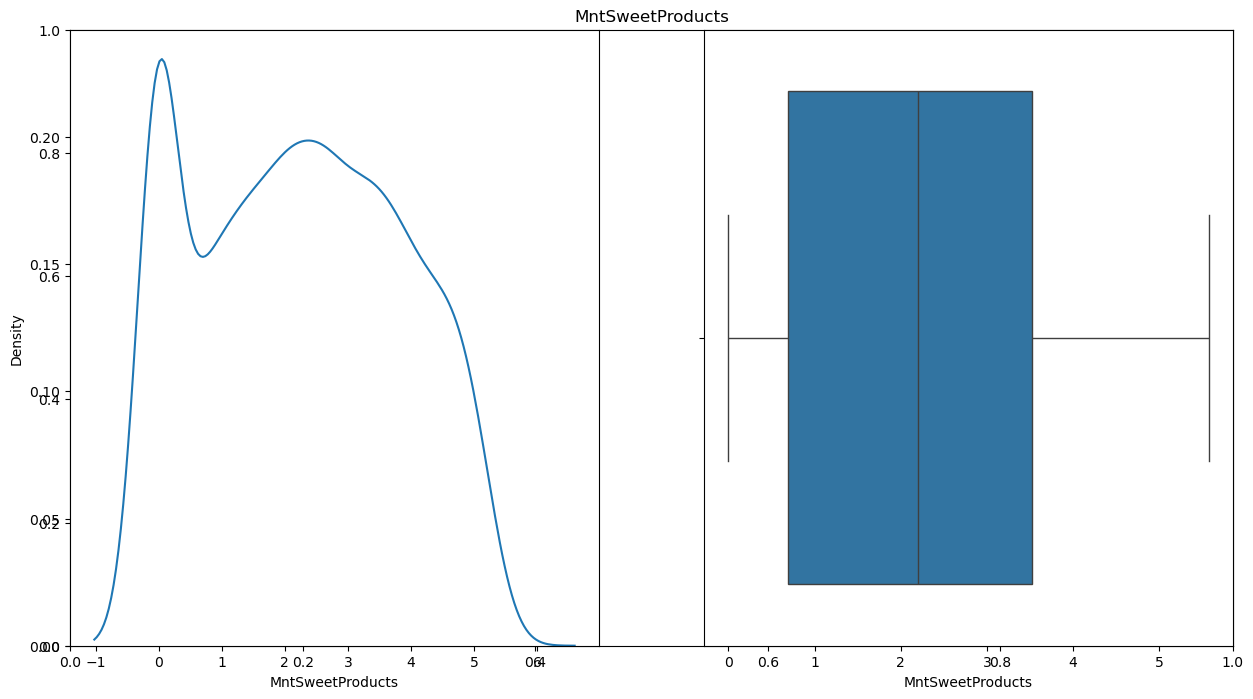

MntSweetProducts
Skewness: 0.08237964293158638
Kurtosis: -1.1475107369129816


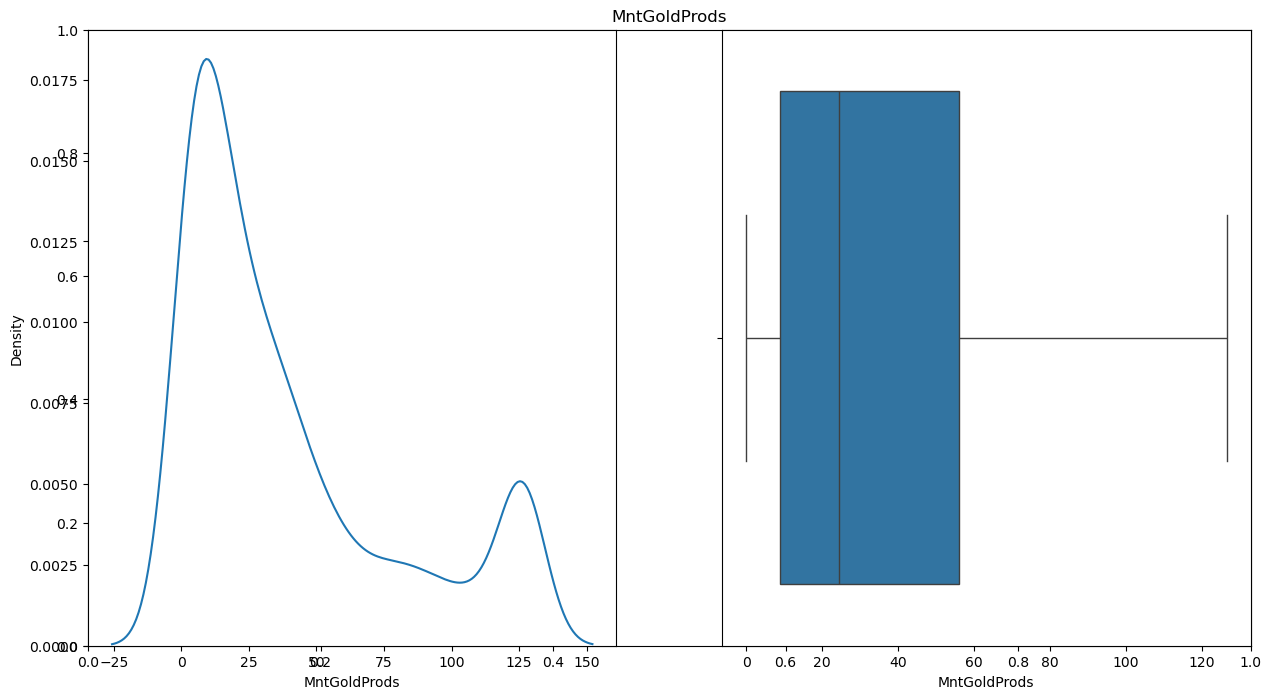

MntGoldProds
Skewness: 1.1105989630390012
Kurtosis: -0.04008767209441988


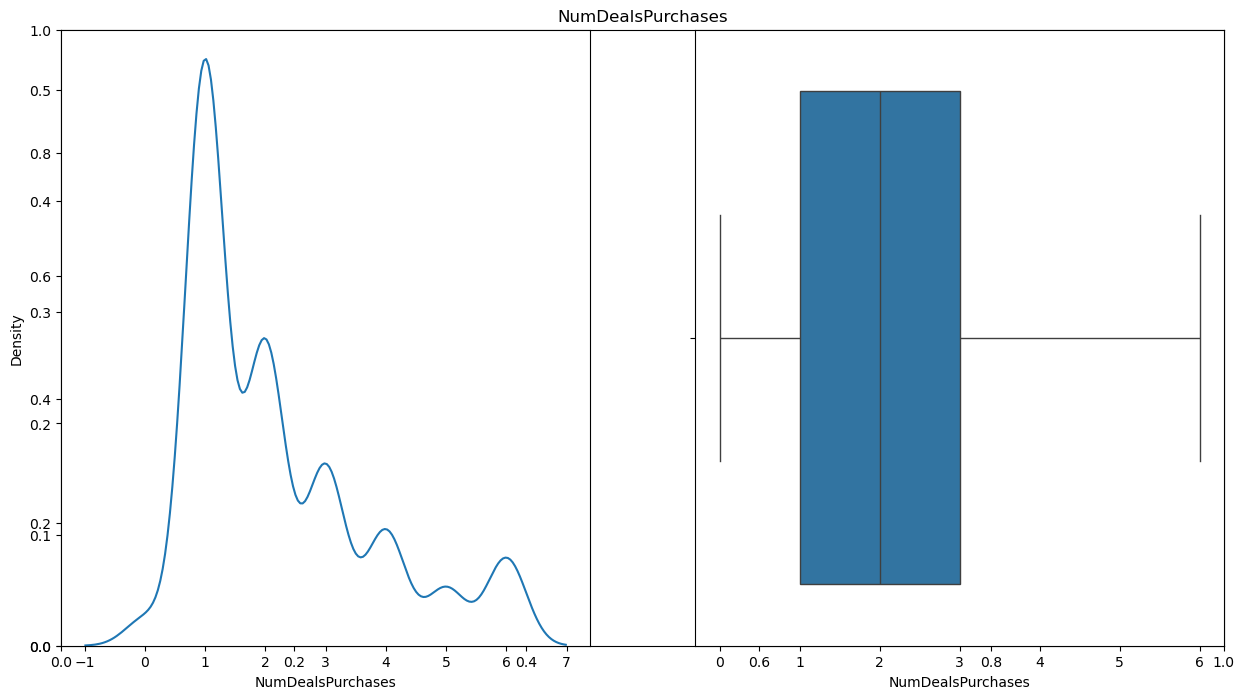

NumDealsPurchases
Skewness: 1.1001338287303208
Kurtosis: 0.274723740849836


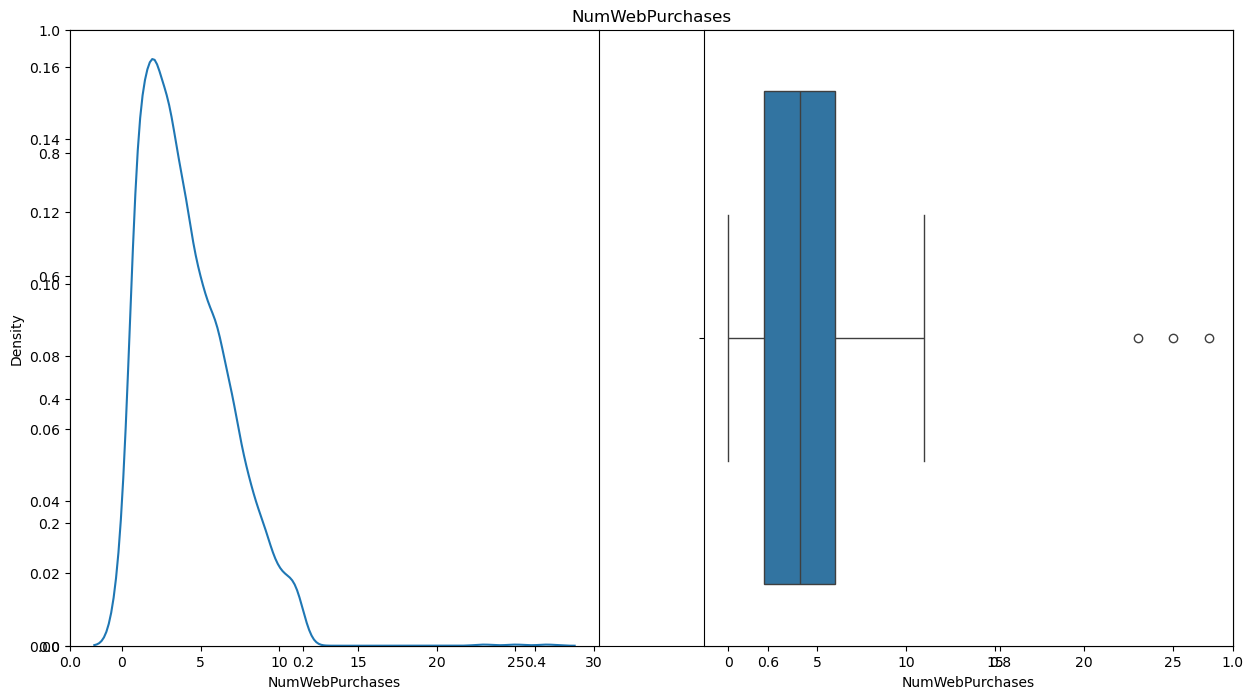

NumWebPurchases
Skewness: 1.1970370130708343
Kurtosis: 4.072136833911461


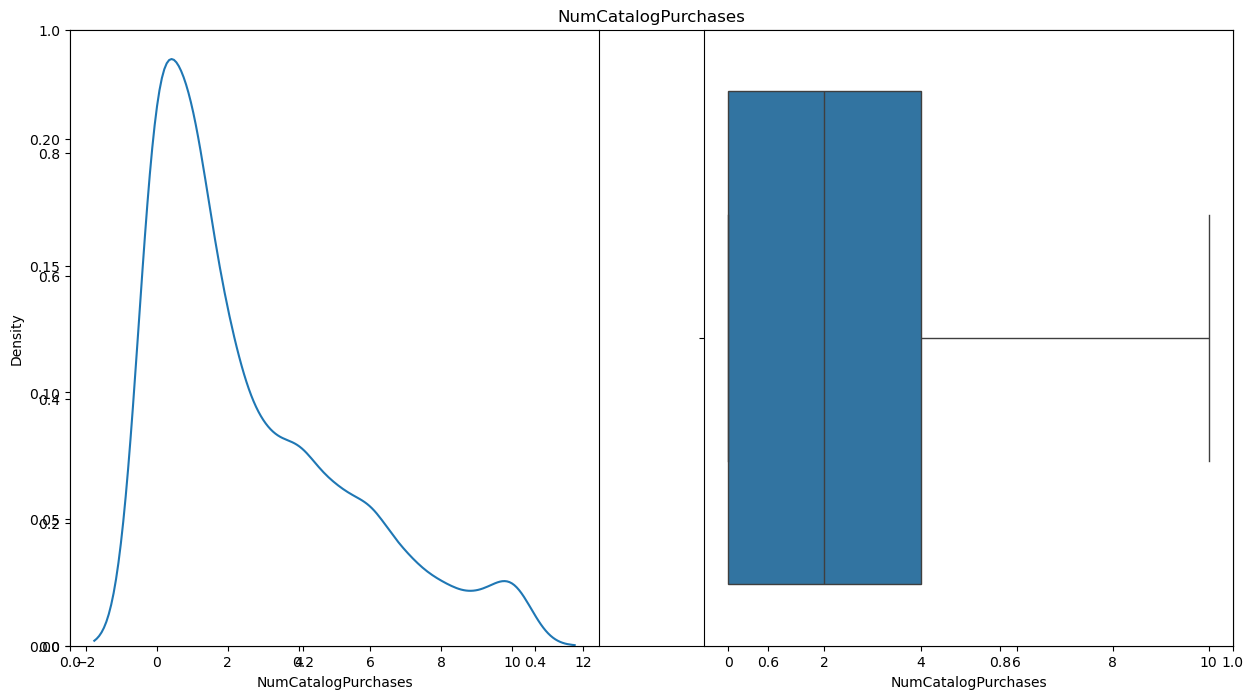

NumCatalogPurchases
Skewness: 1.066514792526679
Kurtosis: 0.24237152063012912


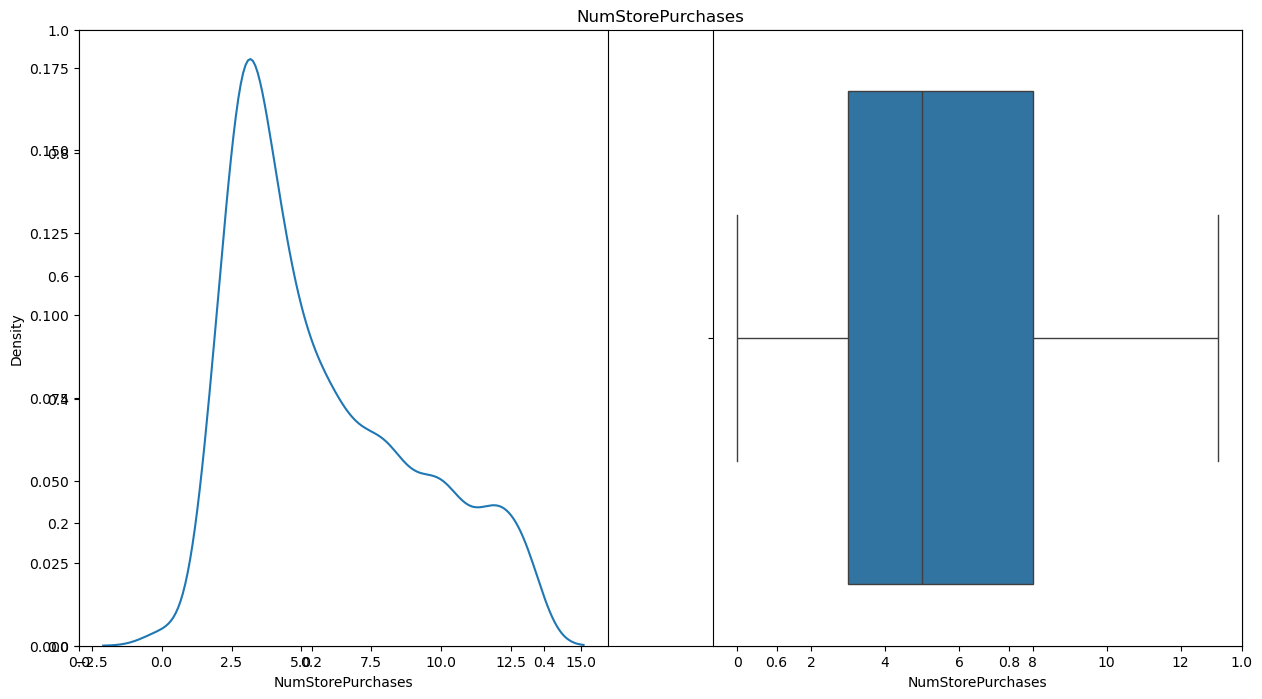

NumStorePurchases
Skewness: 0.7018262973284631
Kurtosis: -0.6264621905184886


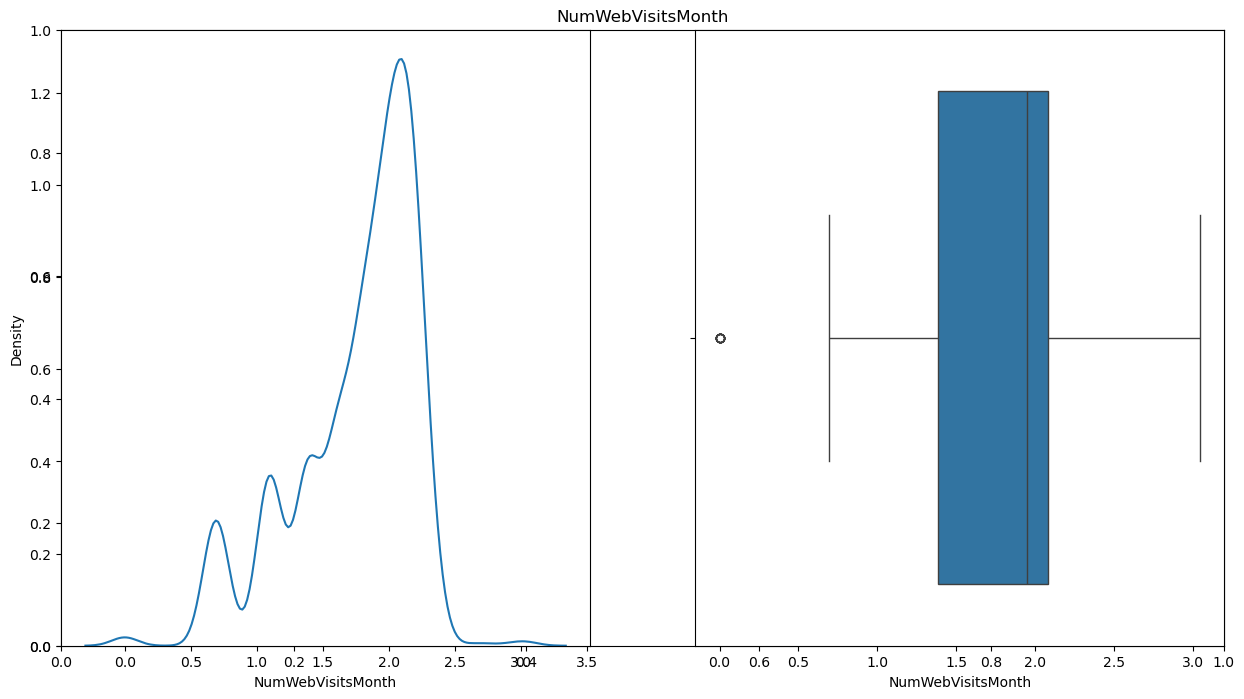

NumWebVisitsMonth
Skewness: -1.0098262252377352
Kurtosis: 0.5798657957430917


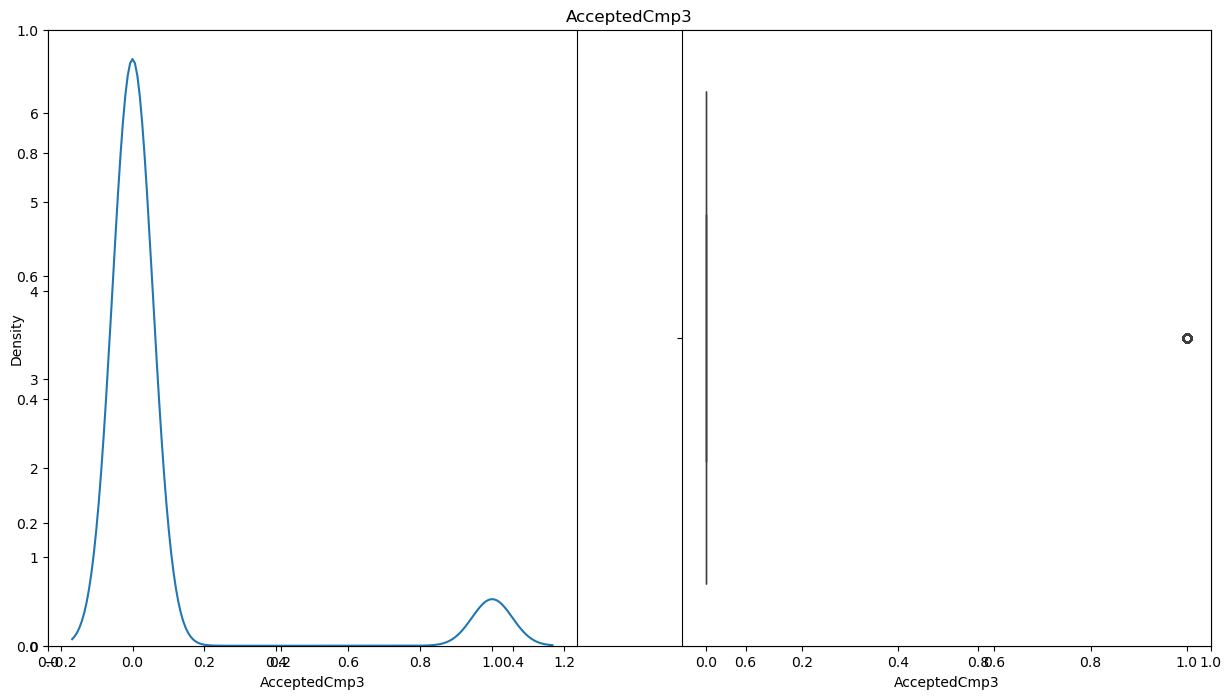

AcceptedCmp3
Skewness: 3.2693969568782
Kurtosis: 8.696804751680888


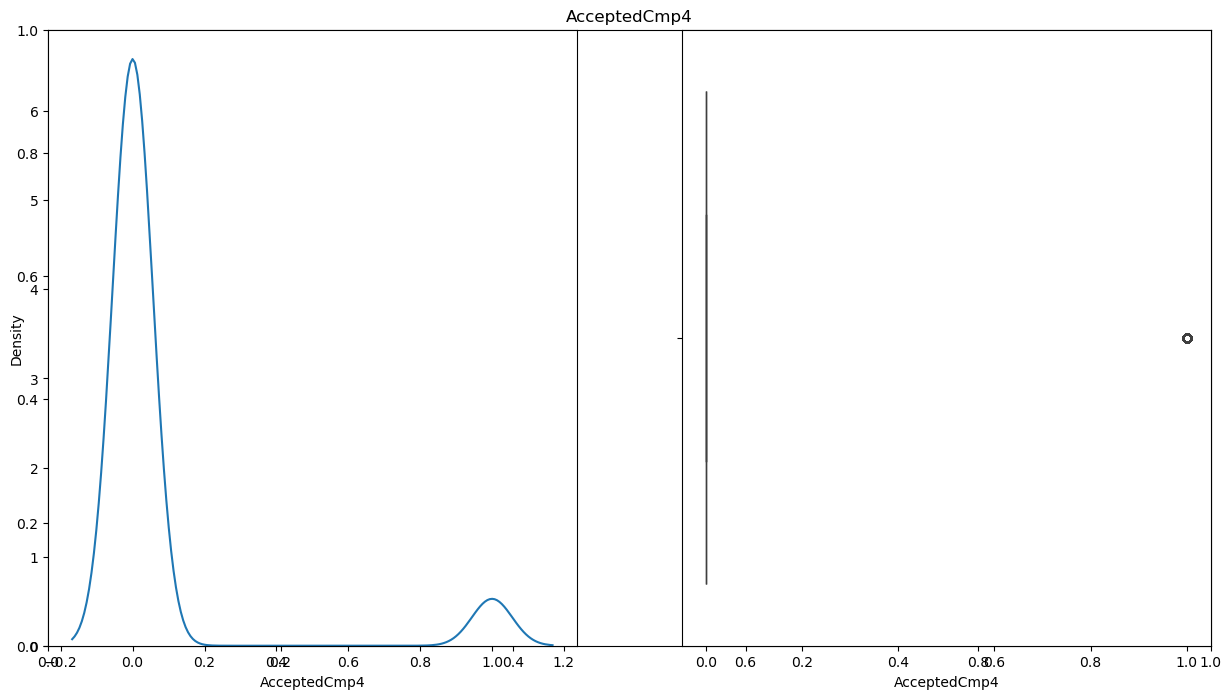

AcceptedCmp4
Skewness: 3.256758193853604
Kurtosis: 8.614247713276223


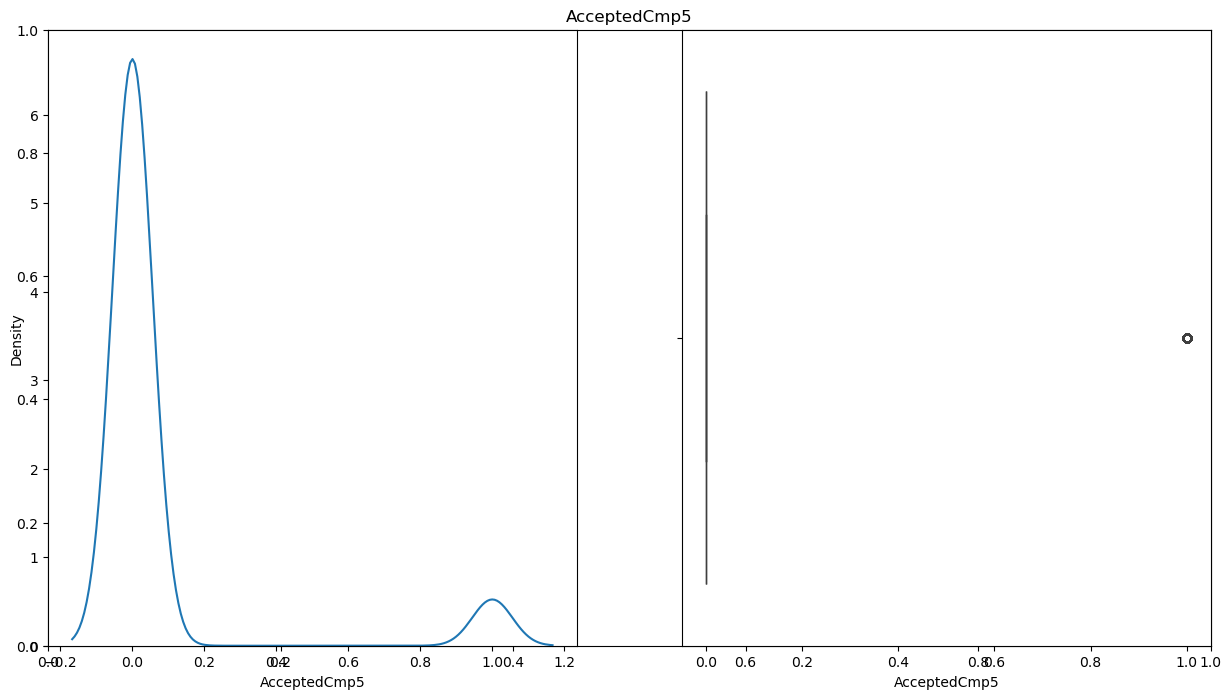

AcceptedCmp5
Skewness: 3.2821432492590605
Kurtosis: 8.780388034900207


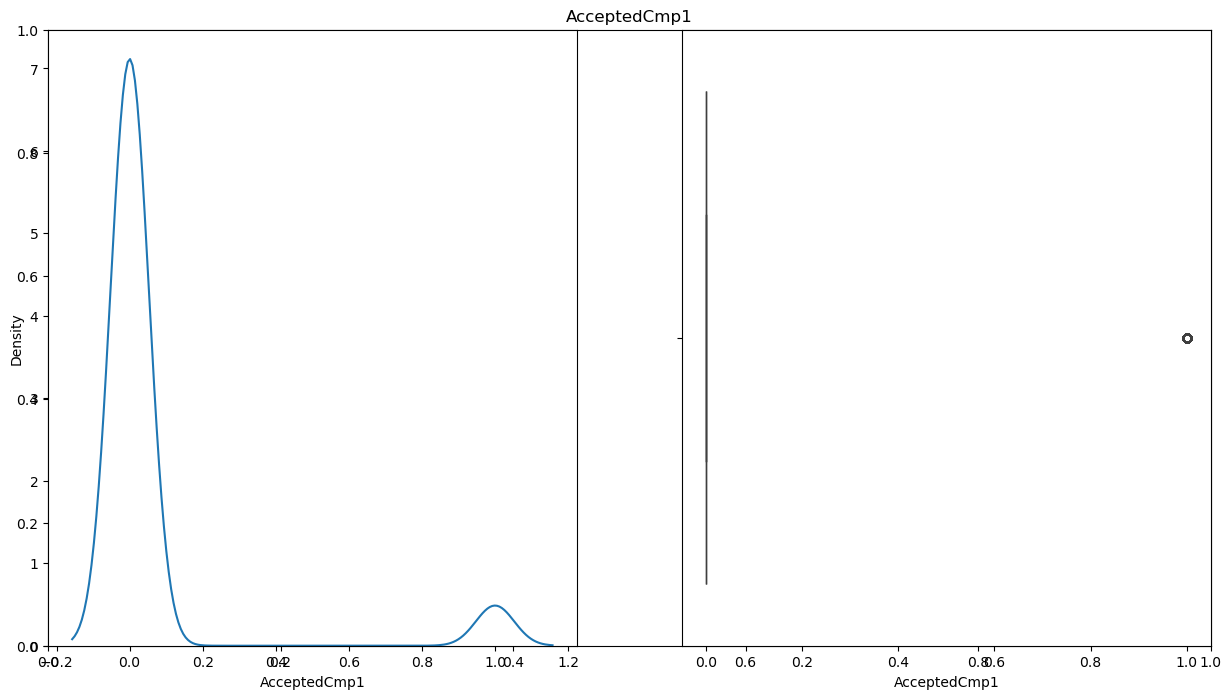

AcceptedCmp1
Skewness: 3.5624821800168314
Kurtosis: 10.700936356748002


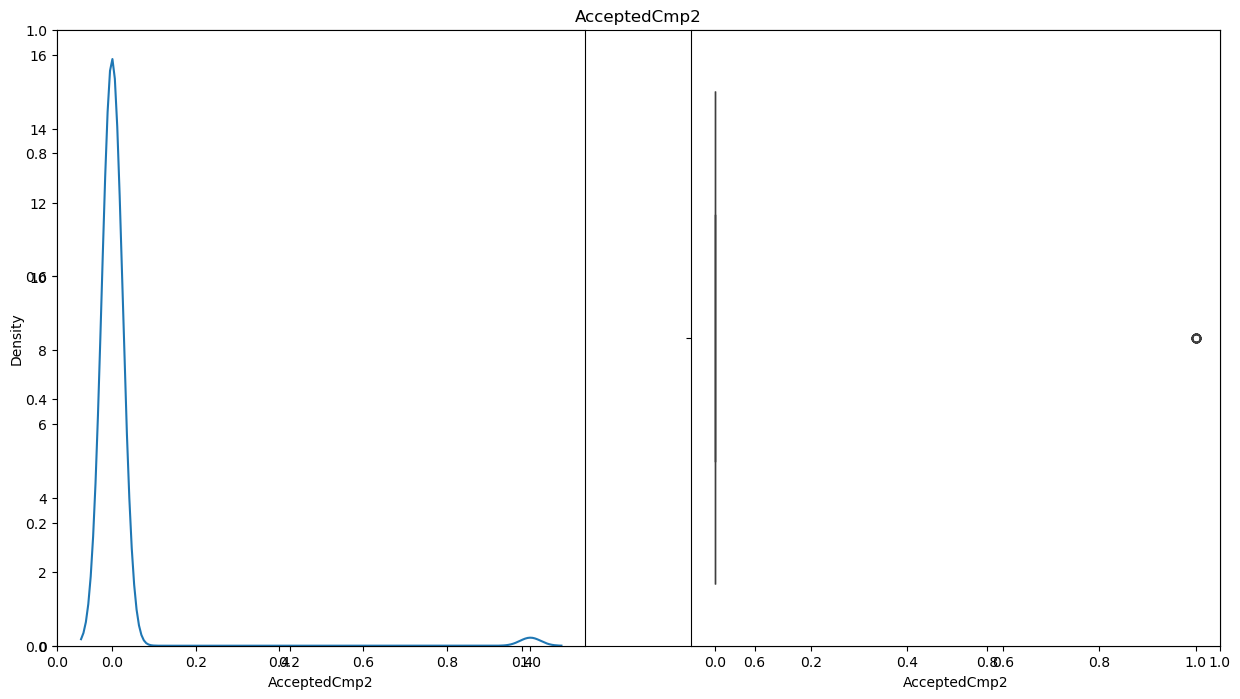

AcceptedCmp2
Skewness: 8.424753003647503
Kurtosis: 69.0387717437126


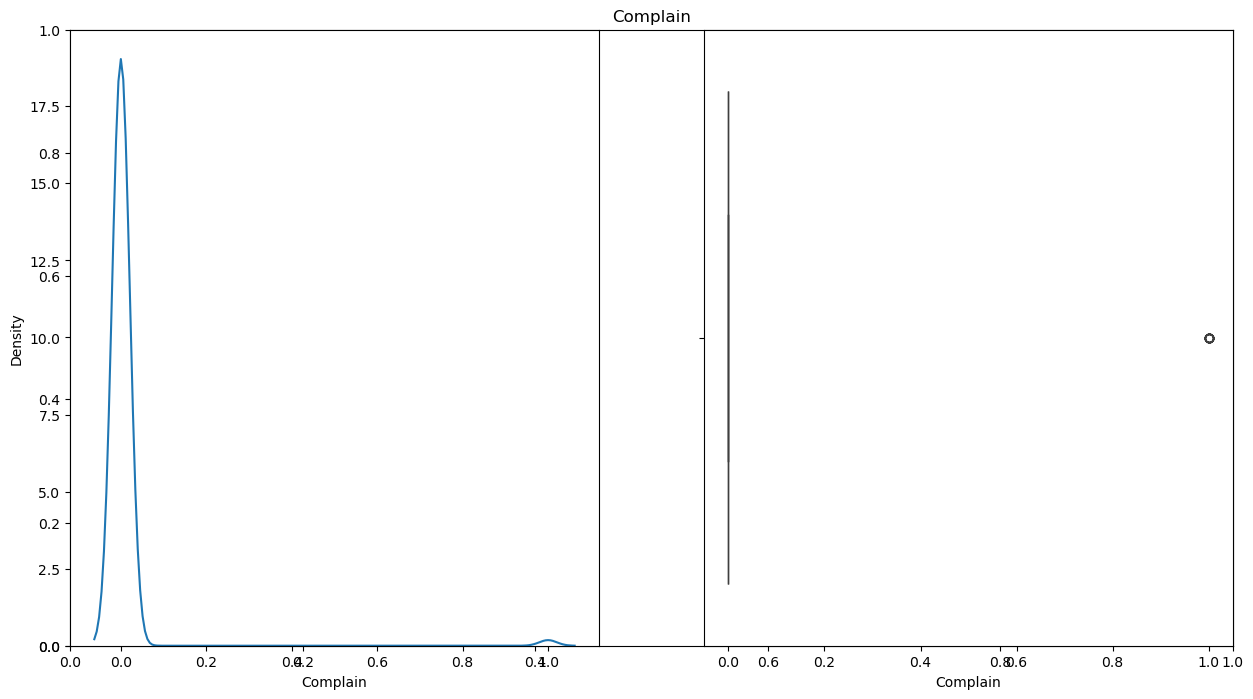

Complain
Skewness: 10.132736682249801
Kurtosis: 100.76329349456955


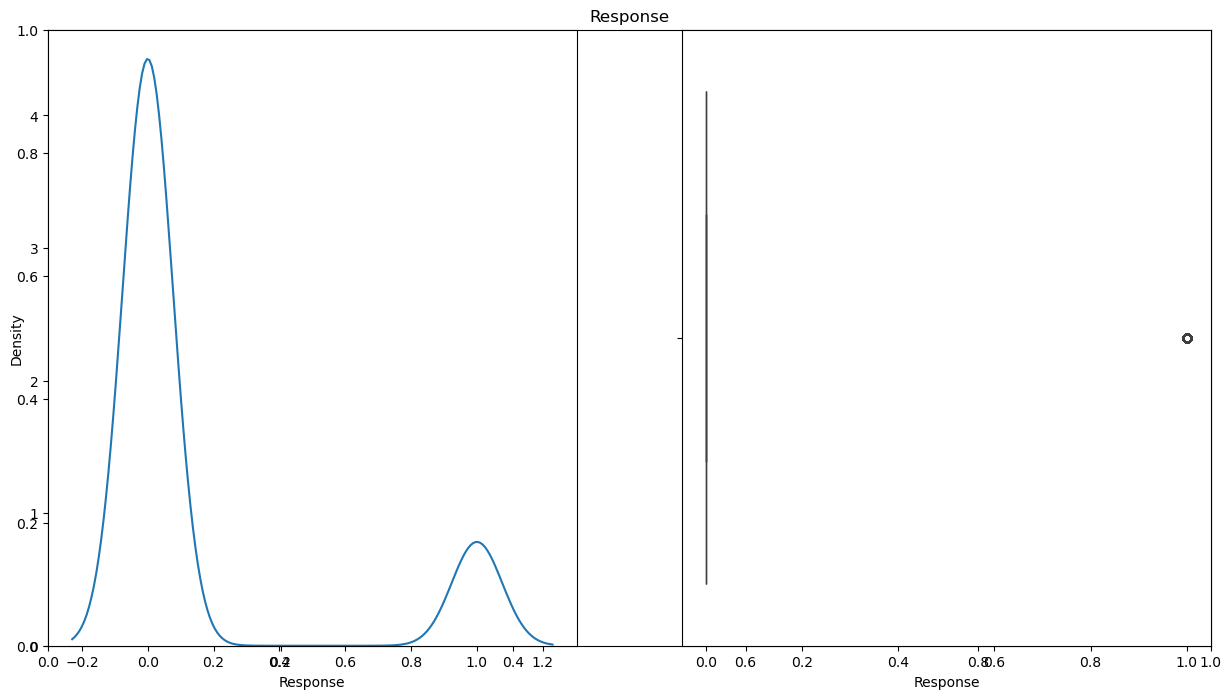

Response
Skewness: 1.9587479194384483
Kurtosis: 1.8383517598954673


In [19]:
# After Outlier treatment
for i in df.select_dtypes(np.number).columns:
    plt.figure(figsize=[15,8])
    plt.title(i)
    plt.subplot(1,2,1)
    sns.kdeplot(x=df[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    plt.show()
    print(i)
    print('Skewness:',df[i].skew())
    print('Kurtosis:',df[i].kurt())

## Feature Engineering

In [20]:
# Customer Age
df['Customer_Age'] = 2025 - df['Year_Birth']

# To understand customer lifecycle stage (e.g., young vs senior) which can influence spending behavior.

In [21]:
# Children in Household
df['Children'] = df['Kidhome'] + df['Teenhome']

# To assess household responsibilities, which often affect spending patterns and product preferences.

In [22]:
# Customer Tenure
df['Tenure'] = 2025 - df['Dt_Customer'].dt.year

# To measure customer loyalty and duration of relationship, which can impact marketing strategies.

In [23]:
# Total Spending

spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['Total_Spending'] = df[spending_cols].sum(axis=1)


# To identify high-value customers based on their overall purchase amount across categories.

In [24]:
# Campaign Acceptance Total
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                 'AcceptedCmp4', 'AcceptedCmp5']

df['TotalAcceptedCmp'] = df[campaign_cols].sum(axis=1)

# To evaluate how receptive a customer is to marketing campaigns and promotions.

## Encoding Categorical Variables

In [25]:
# One-hot encode Education and Marital_Status
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


In [26]:

encoded_cols = ['Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD',
    'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married',
    'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow',
    'Marital_Status_YOLO']

# Convert them all to int
df[encoded_cols] = df[encoded_cols].astype(int)


In [27]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Children,Tenure,Total_Spending,TotalAcceptedCmp,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,10.970592,0,0,2012-09-04,58,6.455199,4.488636,6.304449,120.5,4.488636,88.0,3.0,8,10.0,4,2.079442,0,0,0,0,0,0,1,68,0,13,230.236920,0,0,1,0,0,0,0,0,1,0,0,0
1,2174,1954,10.743869,1,1,2014-03-08,38,2.484907,0.693147,1.945910,2.0,0.693147,6.0,2.0,1,1.0,2,1.791759,0,0,0,0,0,0,0,71,2,11,13.817111,0,0,1,0,0,0,0,0,1,0,0,0
2,4141,1965,11.179046,0,0,2013-08-21,26,6.056784,3.912023,4.852030,111.0,3.091042,42.0,1.0,8,2.0,10,1.609438,0,0,0,0,0,0,0,60,0,12,170.911880,0,0,1,0,0,0,0,0,0,1,0,0
3,6182,1984,10.190432,1,0,2014-02-10,26,2.484907,1.609438,3.044522,10.0,1.386294,5.0,2.0,2,0.0,4,1.945910,0,0,0,0,0,0,0,41,1,11,23.525161,0,0,1,0,0,0,0,0,0,1,0,0
4,5324,1981,10.973254,1,0,2014-01-19,94,5.159055,3.784190,4.779123,46.0,3.332205,15.0,5.0,5,3.0,6,1.791759,0,0,0,0,0,0,0,44,1,11,78.054573,0,0,0,0,1,0,0,1,0,0,0,0


Encoding is the process of converting categorical variables into a numeric format, which is essential for many machine learning algorithms. In this task, encoding is necessary only if the dataset is being prepared for modeling.

However, if the goal is to perform basic analysis, visualizations, or summary statistics, encoding is not required.

Since the objective of this task is Data Cleaning and Preprocessing, encoding may be applied as a preparation step for potential modeling, ensuring the dataset is fully numeric and ready for machine learning if needed.

### Rename Columns 

In [28]:
# Convert all column names to lowercase and replace spaces and special chars with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')


In [29]:
# Rename columns for Cleanliness & Consistency

df.rename(columns={
    'kidhome': 'num_kids',
    'teenhome': 'num_teens',
    'dt_customer': 'date_customer_joined',
    'recency': 'recency_days',
    'mntwines': 'spend_wines',
    'mntfruits': 'spend_fruits',
    'mntmeatproducts': 'spend_meat',
    'mntfishproducts': 'spend_fish',
    'mntsweetproducts': 'spend_sweets',
    'mntgoldprods': 'spend_gold',
    'numdealspurchases': 'purchases_deals',
    'numwebpurchases': 'purchases_web',
    'numcatalogpurchases': 'purchases_catalog',
    'numstorepurchases': 'purchases_store',
    'numwebvisitsmonth': 'web_visits_monthly',
    'acceptedcmp1' : 'accepted_cmp1',
    'acceptedcmp2' : 'accepted_cmp2',
    'acceptedcmp3' : 'accepted_cmp3',
    'acceptedcmp4' : 'accepted_cmp4',
    'acceptedcmp5' : 'accepted_cmp5',
    'totalacceptedcmp' :'total_campaigns_accepted'
}, inplace=True)


### Final cleaned Dataset 

In [30]:
df.head() 

,id,year_birth,income,num_kids,num_teens,date_customer_joined,recency_days,spend_wines,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,purchases_deals,purchases_web,purchases_catalog,purchases_store,web_visits_monthly,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response,customer_age,children,tenure,total_spending,total_campaigns_accepted,education_basic,education_graduation,education_master,education_phd,marital_status_alone,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,marital_status_yolo
0,5524,1957,10.970592,0,0,2012-09-04,58,6.455199,4.488636,6.304449,120.5,4.488636,88.0,3.0,8,10.0,4,2.079442,0,0,0,0,0,0,1,68,0,13,230.236920,0,0,1,0,0,0,0,0,1,0,0,0
1,2174,1954,10.743869,1,1,2014-03-08,38,2.484907,0.693147,1.945910,2.0,0.693147,6.0,2.0,1,1.0,2,1.791759,0,0,0,0,0,0,0,71,2,11,13.817111,0,0,1,0,0,0,0,0,1,0,0,0
2,4141,1965,11.179046,0,0,2013-08-21,26,6.056784,3.912023,4.852030,111.0,3.091042,42.0,1.0,8,2.0,10,1.609438,0,0,0,0,0,0,0,60,0,12,170.911880,0,0,1,0,0,0,0,0,0,1,0,0
3,6182,1984,10.190432,1,0,2014-02-10,26,2.484907,1.609438,3.044522,10.0,1.386294,5.0,2.0,2,0.0,4,1.945910,0,0,0,0,0,0,0,41,1,11,23.525161,0,0,1,0,0,0,0,0,0,1,0,0
4,5324,1981,10.973254,1,0,2014-01-19,94,5.159055,3.784190,4.779123,46.0,3.332205,15.0,5.0,5,3.0,6,1.791759,0,0,0,0,0,0,0,44,1,11,78.054573,0,0,0,0,1,0,0,1,0,0,0,0
